# Projet 9 - Produisez une étude de marché avec R ou Python

## Sommaire

### Étape 1 - Visualisation et Nettoyage des données 

In [117]:
import numpy as np #On importe les bibliothèques correspondantes ainsi que le module Re
import pandas as pd
import seaborn as sns
import re
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import math as mth

In [118]:
 #On importe les fichiers CSV correspondants

liste_pays_fr_en = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\Liste des pays FR EN - sql sh.csv")
total_population = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\Total Population - WB.csv")
political_stability = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\Political Stability - WB.csv")
pib_ppa_habitant= pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\PIB PPA par habitant - WB.csv")
import_valeur_volaille_continent = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\OEC Import Valeur Viande Volaille avec continent - bonus %Import mondial et ranking.csv")
export_valeur_volaille_continent = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\OEC Export Valeur Viande Volaille avec continent - bonus %Export mondial et ranking.csv")
indice_logistique = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\Indice de Performance Logistique - 2018 -  WB.csv")
import_poulet_quantite_fao = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\FAOSTAT Import Poulet en boite Quantité 2018 - bonus % Disponibilité intérieure de volaille FAO.csv")
code_iso3_fao = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\FAOSTAT Country ISO 3.csv")
disponibilite_intérieure_fao = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\FAOSTAT - Bilans Alimentaires viande volaille 2018 -  Disponibilité intérieure.csv")
disponibilite_alimentaire_fao = pd.read_csv(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\FAOSTAT - Bilans Alimentaires viande volaille 2018 -  Disponibilité alimentaire en kg.csv")
distance = pd.read_excel(r"D:\Documents\OpenClassrooms\Parcours Data Analyst\P9_pedil_nicolas\Données récoltées\Données retenues\distance_cepii - Bonus émission.xls")

#### Visualisation des données de nos 12 Dataframes

In [119]:
#On visualise les données de nos 12 dataframes : 

dataframes_list = [liste_pays_fr_en, total_population, political_stability, pib_ppa_habitant, import_valeur_volaille_continent, export_valeur_volaille_continent, indice_logistique, import_poulet_quantite_fao, code_iso3_fao, disponibilite_intérieure_fao, disponibilite_alimentaire_fao, distance]
dataframes_names = ['liste_pays_fr_en', 'total_population', 'political_stability', 'pib_ppa_habitant', 'import_valeur_volaille_continent', 'export_valeur_volaille_continent', 'indice_logistique', 'import_poulet_quantite_fao', 'code_iso3_fao', 'disponibilite_intérieure_fao', 'disponibilite_alimentaire_fao', 'distance']
compteur = 0
for dataframe in dataframes_list :
        dataframe_name = dataframes_names[compteur]
        print("Informations du DataFrame", dataframe_name, ": \n")
        print(dataframe.info())
        print("-----------------------------------------------------------------------------")
        print("Affichage du DataFrame", dataframe_name, ": \n")
        print(dataframe.head())
        compteur = compteur + 1
        print("-----------------------------------------------------------------------------")
        print("-----------------------------------------------------------------------------")
        

Informations du DataFrame liste_pays_fr_en : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  241 non-null    object
 1   Pays (FR)     241 non-null    object
 2   Pays (EN)     241 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB
None
-----------------------------------------------------------------------------
Affichage du DataFrame liste_pays_fr_en : 

  Country Code          Pays (FR)       Pays (EN)
0          AFG        Afghanistan     Afghanistan
1          ALB            Albanie         Albania
2          ATA        Antarctique      Antarctica
3          DZA            Algérie         Algeria
4          ASM  Samoa Américaines  American Samoa
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Informations du 

### Nettoyage de nos 12 dataframes

In [120]:
#On vérifie les doublons, valeurs manquantes, avant de nettoyer/fusionner les 12 dataframes
dataframes_list = [liste_pays_fr_en, total_population, political_stability, pib_ppa_habitant, import_valeur_volaille_continent, export_valeur_volaille_continent, indice_logistique, import_poulet_quantite_fao, code_iso3_fao, disponibilite_intérieure_fao, disponibilite_alimentaire_fao, distance]
dataframes_names = ['liste_pays_fr_en', 'total_population', 'political_stability', 'pib_ppa_habitant', 'import_valeur_volaille_continent', 'export_valeur_volaille_continent', 'indice_logistique', 'import_poulet_quantite_fao', 'code_iso3_fao', 'disponibilite_intérieure_fao', 'disponibilite_alimentaire_fao', 'distance']
compteur = 0
for dataframe in dataframes_list :
    dataframe_name = dataframes_names[compteur]
    print("Nombre de doublons dans", dataframe_name, ": \n")
    print(dataframe.duplicated().sum())
    print("-----------------------------------------------------------------------------")
    print("Nombre de valeurs nulles dans", dataframe_name, ": \n")
    print(dataframe.isnull().sum())
    compteur = compteur + 1
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")
        

Nombre de doublons dans liste_pays_fr_en : 

0
-----------------------------------------------------------------------------
Nombre de valeurs nulles dans liste_pays_fr_en : 

Country Code    0
Pays (FR)       0
Pays (EN)       0
dtype: int64
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Nombre de doublons dans total_population : 

0
-----------------------------------------------------------------------------
Nombre de valeurs nulles dans total_population : 

Country Name                0
Country Code                0
Population Totale (2018)    1
dtype: int64
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Nombre de doublons dans political_stability : 

0
-----------------------------------------------------------------------------
Nombre de valeurs nulles dans politica

#### On fait le bilan des doublons et valeurs nulles (manquantes)

Il n'y a aucun doublon dans tous les dataframes.

total_population a une valeur nulle.

pib_ppa_habitant a 24 valeurs nulles (PIB PPA $ internationaux courants par habitant (2018)).

export_valeur_volaille_continent a une valeur nulle (ISO 3).

indice_logistique a 59 valeurs nulles (Indice de performance logistique - performance globale (2018)).

import_poulet_quantite_fao a 1 valeur nulle (Importations Poulet en boite – Quantité (en Tonnes) – 2018).

#### Nettoyage de total_population

In [121]:
#Acquisition et visualisation de la valeur nulle
#On crée un mini DF de valeurs manquantes

tp_null = total_population[total_population.isnull().any(axis=1)]
tp_null.head()

,Country Name,Country Code,Population Totale (2018)
61,Eritrea,ERI,NaN


On voit que seul l'Érythrée a une valeur manquante, on va donc la compléter avec le nombre 3,452,797.
(Source:https://population.un.org/wpp/Download/Standard/Population/)

In [122]:
#On remplit la valeur manquante avec le nombre puis on affiche la ligne 61

total_population["Population Totale (2018)"].fillna("3452797", inplace = True)
total_population.iloc[61]

Country Name                Eritrea
Country Code                    ERI
Population Totale (2018)    3452797
Name: 61, dtype: object

In [123]:
#On peut afficher le df total_population
total_population.head(62)

,Country Name,Country Code,Population Totale (2018)
0,Afghanistan,AFG,37171922.0
1,Albania,ALB,2866376.0
2,Algeria,DZA,42228415.0
3,American Samoa,ASM,55461.0
4,Andorra,AND,77008.0
...,...,...,...
57,Ecuador,ECU,17084359.0
58,Egypt Arab Rep.,EGY,98423602.0
59,El Salvador,SLV,6420740.0
60,Equatorial Guinea,GNQ,1308966.0


In [124]:
#On revérifie les valeurs nulles dans total_population
print("Nombre de valeurs nulles dans total_population : \n")
print(total_population.isnull().sum())

Nombre de valeurs nulles dans total_population : 

Country Name                0
Country Code                0
Population Totale (2018)    0
dtype: int64


Le dataframe total_population a été nettoyé et est prêt pour la fusion.

#### Nettoyage de pib_ppa_habitant

In [125]:
#Acquisition et visualisation de la valeur nulle
#On crée un mini DF de valeurs manquantes

pibppah_null = pib_ppa_habitant[pib_ppa_habitant.isnull().any(axis=1)]
pibppah_null.head(25)

,Country Name,Country Code,PIB PPA $ internationaux courants par habitant (2018)
4,Andorre,AND,NaN
9,Samoa américaines,ASM,NaN
36,Îles Anglo-Normandes,CHI,NaN
48,Cuba,CUB,NaN
67,Érythrée,ERI,NaN
76,Îles Féroé,FRO,NaN
82,Gibraltar,GIB,NaN
89,Groenland,GRL,NaN
91,Guam,GUM,NaN
106,Île de Man,IMN,NaN


On remarque que ce sont des pays sous embargo commercial, en guerre, ou peu peuplés d'un point de vue business et réputation, ce n'est pas pertinent d'exporter du poulet vers ces pays du coup, on va les sortir de l'analyse.

In [126]:
#On supprime les lignes contenant des valeurs inconnues
#Puis on vérifie le nombre de valeurs nulles à nouveau
#Enfin on recompte le nombre de lignes

pib_ppa_habitant = pib_ppa_habitant.dropna()
print("Nombre de valeurs nulles dans pib_ppa_habitant: \n")
print(pib_ppa_habitant.isnull().sum())
print("Informations du DataFrame pib_ppa_habitant: \n")
print(pib_ppa_habitant.info())

Nombre de valeurs nulles dans pib_ppa_habitant: 

Country Name                                             0
Country Code                                             0
PIB PPA $ internationaux courants par habitant (2018)    0
dtype: int64
Informations du DataFrame pib_ppa_habitant: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 263
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country Name                                           240 non-null    object 
 1   Country Code                                           240 non-null    object 
 2   PIB PPA $ internationaux courants par habitant (2018)  240 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.5+ KB
None


In [127]:
#On peut afficher le df pib_ppa_habitant
pib_ppa_habitant.head()

,Country Name,Country Code,PIB PPA $ internationaux courants par habitant (2018)
0,Aruba,ABW,40143.000266
1,Afghanistan,AFG,2082.392197
2,Angola,AGO,7148.933253
3,Albanie,ALB,13498.138167
5,Le monde arabe,ARB,14821.630443


Le dataframe pib_ppa_habitant a été nettoyé et est prêt pour la fusion.

#### Nettoyage de export_valeur_volaille_continent

In [128]:
#Acquisition et visualisation de la valeur nulle
#On crée un mini DF de valeurs manquantes

evvc_null = export_valeur_volaille_continent[export_valeur_volaille_continent.isnull().any(axis=1)]
evvc_null.head()

,Continent,Country,ISO 3,Exportations – Viande de volaille (en $) - 2018
77,Asia,Chinese Taipei,NaN,8643923.0


En fait, Chinese Taipei correspond à Taïwan dont l'ISO code est "TWN".

(Voir : https://fr.wikipedia.org/wiki/Taipei_chinois)

In [129]:
#On remplit la valeur manquante avec le code puis on affiche la ligne 77

export_valeur_volaille_continent["ISO 3"].fillna("TWN", inplace = True)
export_valeur_volaille_continent.iloc[77]

Continent                                                    Asia
Country                                            Chinese Taipei
ISO 3                                                         TWN
Exportations – Viande de volaille (en $) - 2018         8643923.0
Name: 77, dtype: object

In [130]:
#On peut afficher le df export_valeur_volaille_continent

export_valeur_volaille_continent.head(78)

,Continent,Country,ISO 3,Exportations – Viande de volaille (en $) - 2018
0,Africa,Angola,AGO,256232.0
1,Africa,Benin,BEN,30910552.0
2,Africa,Botswana,BWA,310139.0
3,Africa,Cote d'Ivoire,CIV,43287.0
4,Africa,Cameroon,CMR,4118.0
...,...,...,...,...
73,Asia,Tajikistan,TJK,204116.0
74,Asia,Turkey,TUR,606712601.0
75,Asia,Uzbekistan,UZB,49310.0
76,Asia,Vietnam,VNM,26043626.0


In [131]:
#On vérifie le nombre de valeurs nulles à nouveau
#Enfin on recompte le nombre de lignes

print("Nombre de valeurs nulles dans export_valeur_volaille_continent: \n")
print(export_valeur_volaille_continent.isnull().sum())
print("Informations du DataFrame export_valeur_volaille_continent: \n")
print(export_valeur_volaille_continent.info())

Nombre de valeurs nulles dans export_valeur_volaille_continent: 

Continent                                          0
Country                                            0
ISO 3                                              0
Exportations – Viande de volaille (en $) - 2018    0
dtype: int64
Informations du DataFrame export_valeur_volaille_continent: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Continent                                        162 non-null    object 
 1   Country                                          162 non-null    object 
 2   ISO 3                                            162 non-null    object 
 3   Exportations – Viande de volaille (en $) - 2018  162 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.2+ KB
None


Le dataframe export_valeur_volaille_continent a été nettoyé et est prêt pour la fusion.

#### Nettoyage de indice_logistique

In [132]:
#Acquisition et visualisation de la valeur nulle
#On crée un mini DF de valeurs manquantes

il_null = indice_logistique[indice_logistique.isnull().any(axis=1)]
il_null.head(59)

,Country Name,Country Code,Indice de performance logistique - performance globale (2018)
0,Aruba,ABW,NaN
4,Andorre,AND,NaN
9,Samoa américaines,ASM,NaN
10,Antigua-et-Barbuda,ATG,NaN
13,Azerbaïdjan,AZE,NaN
24,Belize,BLZ,NaN
25,Bermudes,BMU,NaN
28,Barbade,BRB,NaN
31,Botswana,BWA,NaN
36,Îles Anglo-Normandes,CHI,NaN


On remarque que ce sont des pays sous embargo commercial, en guerre, ou peu peuplés d'un point de vue business et réputation, ce n'est pas pertinent d'exporter du poulet vers ces pays du coup, on va les sortir de l'analyse.

In [133]:
#On supprime les lignes contenant des valeurs inconnues
#Puis on vérifie le nombre de valeurs nulles à nouveau
#Enfin on recompte le nombre de lignes

indice_logistique = indice_logistique.dropna()
print("Nombre de valeurs nulles dans indice_logistique: \n")
print(indice_logistique.isnull().sum())
print("Informations du DataFrame indice_logistique: \n")
print(indice_logistique.info())

Nombre de valeurs nulles dans indice_logistique: 

Country Name                                                     0
Country Code                                                     0
Indice de performance logistique - performance globale (2018)    0
dtype: int64
Informations du DataFrame indice_logistique: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 263
Data columns (total 3 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country Name                                                   205 non-null    object 
 1   Country Code                                                   205 non-null    object 
 2   Indice de performance logistique - performance globale (2018)  205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB
None


In [134]:
#On peut afficher le df indice_logistique
indice_logistique.head()

,Country Name,Country Code,Indice de performance logistique - performance globale (2018)
1,Afghanistan,AFG,1.950000
2,Angola,AGO,2.050000
3,Albanie,ALB,2.660000
5,Le monde arabe,ARB,2.678095
6,Émirats arabes unis,ARE,3.960000


#### Nettoyage de import_poulet_quantite_fao

In [135]:
#Acquisition et visualisation de la valeur nulle
#On crée un mini DF de valeurs manquantes

ipqfao_null = import_poulet_quantite_fao[import_poulet_quantite_fao.isnull().any(axis=1)]
ipqfao_null.head()

,Zone,Importations Poulet en boite – Quantité (en Tonnes) – 2018
171,Venezuela (République bolivarienne du),NaN


On voit que c'est le Vénézuela qui n'a pas de valeur, on va donc compléter avec la valeur trouvée sur le site de la FAO : 2676.

(Source: https://www.fao.org/faostat/fr/#data/SCL)

In [136]:
#On remplit la valeur manquante avec le code puis on affiche la ligne 171

import_poulet_quantite_fao["Importations Poulet en boite – Quantité (en Tonnes) – 2018"].fillna("2676", inplace = True)
import_poulet_quantite_fao.iloc[171]

Zone                                                          Venezuela (République bolivarienne du)
Importations Poulet en boite – Quantité (en Tonnes) – 2018                                      2676
Name: 171, dtype: object

In [137]:
#On peut afficher le df import_poulet_quantite_fao
import_poulet_quantite_fao.head(172)

,Zone,Importations Poulet en boite – Quantité (en Tonnes) – 2018
0,Afghanistan,241.0
1,Afrique du Sud,777.0
2,Albanie,162.0
3,Allemagne,174768.0
4,Angola,257.0
...,...,...
167,Turquie,30.0
168,Ukraine,2132.0
169,Uruguay,4084.0
170,Vanuatu,202.0


In [138]:
#On vérifie le nombre de valeurs nulles à nouveau
#Enfin on recompte le nombre de lignes

print("Nombre de valeurs nulles dans import_poulet_quantite_fao: \n")
print(import_poulet_quantite_fao.isnull().sum())
print("Informations du DataFrame import_poulet_quantite_fao: \n")
print(import_poulet_quantite_fao.info())

Nombre de valeurs nulles dans import_poulet_quantite_fao: 

Zone                                                          0
Importations Poulet en boite – Quantité (en Tonnes) – 2018    0
dtype: int64
Informations du DataFrame import_poulet_quantite_fao: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Zone                                                        176 non-null    object
 1   Importations Poulet en boite – Quantité (en Tonnes) – 2018  176 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB
None


### Rajout préléminaire des codes ISO pour faciliter les fusions

#### Rajout sur import_poulet_quantite_fao

In [139]:
#On fait la jointure de import_poulet_quantite_fao et code_iso3_fao et on affiche le df
import_poulet_quantite_faos = pd.merge(import_poulet_quantite_fao, code_iso3_fao, left_on='Zone', right_on='Pays', how='inner')
import_poulet_quantite_faos.head()

,Zone,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Pays,Code ISO3
0,Afghanistan,241.0,Afghanistan,AFG
1,Afrique du Sud,777.0,Afrique du Sud,ZAF
2,Albanie,162.0,Albanie,ALB
3,Allemagne,174768.0,Allemagne,DEU
4,Angola,257.0,Angola,AGO


In [140]:
#On vérifie qu'il y a bien 176 valeurs
print("Informations du DataFrame import_poulet_quantite_faos: \n")
print(import_poulet_quantite_faos.info())

Informations du DataFrame import_poulet_quantite_faos: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Zone                                                        176 non-null    object
 1   Importations Poulet en boite – Quantité (en Tonnes) – 2018  176 non-null    object
 2   Pays                                                        176 non-null    object
 3   Code ISO3                                                   176 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB
None


#### Rajout sur disponibilite_intérieure_fao

In [141]:
#On fait la jointure de import_poulet_quantite_fao et code_iso3_fao et on affiche le df
disponibilite_intérieure_faos = pd.merge(disponibilite_intérieure_fao, code_iso3_fao, left_on='Zone', right_on='Pays', how='inner')
disponibilite_intérieure_faos.head()

,Zone,Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Pays,Code ISO3
0,Afghanistan,53,Afghanistan,AFG
1,Afrique du Sud,2156,Afrique du Sud,ZAF
2,Albanie,27,Albanie,ALB
3,Algérie,286,Algérie,DZA
4,Allemagne,1666,Allemagne,DEU


In [142]:
#On vérifie qu'il y a bien 180 valeurs
print("Informations du DataFrame disponibilite_intérieure_faos: \n")
print(disponibilite_intérieure_faos.info())

Informations du DataFrame disponibilite_intérieure_faos: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Zone                                                                          180 non-null    object
 1   Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018  180 non-null    int64 
 2   Pays                                                                          180 non-null    object
 3   Code ISO3                                                                     180 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.0+ KB
None


#### Rajout sur disponibilite_alimentaire_fao

In [143]:
#On fait la jointure de disponibilite_alimentaire_fao et code_iso3_fao et on affiche le df
disponibilite_alimentaire_faos = pd.merge(disponibilite_alimentaire_fao, code_iso3_fao, left_on='Zone', right_on='Pays', how='inner')
disponibilite_alimentaire_faos.head()

,Zone,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Pays,Code ISO3
0,Afghanistan,1.44,Afghanistan,AFG
1,Afrique du Sud,37.31,Afrique du Sud,ZAF
2,Albanie,9.48,Albanie,ALB
3,Algérie,6.76,Algérie,DZA
4,Allemagne,18.15,Allemagne,DEU


In [144]:
#On vérifie qu'il y a bien 180 valeurs
print("Informations du DataFrame disponibilite_alimentaire_faos: \n")
print(disponibilite_alimentaire_faos.info())

Informations du DataFrame disponibilite_alimentaire_faos: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Zone                                                                                        180 non-null    object 
 1   Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018  180 non-null    float64
 2   Pays                                                                                        180 non-null    object 
 3   Code ISO3                                                                                   180 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.0+ KB
None


### Renommage des codes ISO3 pour les 11 dataframes

In [145]:
#On crée des listes des dataframes, noms des colonnes contenant le code ISO3, et le noms des dataframes
#Puis on fait une boucle pour renommer tout les noms des colonnes contenant le code ISO3 en 'Country Code'
#Dans le but de préparer la fusion

dataframe_list = [liste_pays_fr_en, total_population, political_stability, pib_ppa_habitant, import_valeur_volaille_continent, export_valeur_volaille_continent, indice_logistique, import_poulet_quantite_faos, disponibilite_intérieure_faos, disponibilite_alimentaire_faos, distance]
dataframe_names = ['Country Code', 'Country Code', 'Country Code', 'Country Code', 'ISO 3', 'ISO 3', 'Country Code', 'Code ISO3', 'Code ISO3', 'Code ISO3', 'Destination']
dataframe_noms = ['liste_pays_fr_en', 'total_population', 'political_stability', 'pib_ppa_habitant', 'import_valeur_volaille_continent', 'export_valeur_volaille_continent', 'indice_logistique', 'import_poulet_quantite_faos', 'disponibilite_intérieure_faos', 'disponibilite_alimentaire_faos', 'distance']
compteur = 0
for dataframe in dataframe_list :
    dataframe_name = dataframe_names[compteur]
    dataframe_nom = dataframe_noms[compteur]
    print("Affichage de", dataframe_nom, ": \n")
    dataframe.rename(columns={dataframe_name:"Country Code"}, inplace=True)
    print(dataframe.head())
    print("-----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------- \n")
    print("Infos sur", dataframe_nom, ": \n")
    print(dataframe.info())
    compteur = compteur + 1
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------- \n")

    

Affichage de liste_pays_fr_en : 

  Country Code          Pays (FR)       Pays (EN)
0          AFG        Afghanistan     Afghanistan
1          ALB            Albanie         Albania
2          ATA        Antarctique      Antarctica
3          DZA            Algérie         Algeria
4          ASM  Samoa Américaines  American Samoa
-----------------------------------------------------------------------------
----------------------------------------------------------------------------- 

Infos sur liste_pays_fr_en : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  241 non-null    object
 1   Pays (FR)     241 non-null    object
 2   Pays (EN)     241 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB
None
-----------------------------------------------------------------------------
----------------------------------------

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Fusion des 11 dataframes

In [146]:
#On crée une liste des dataframes
#Puis on fait une boucle pour faire les jointures entre les différents dataframes

dataframe_list = [pib_ppa_habitant, import_valeur_volaille_continent, distance, total_population, political_stability, indice_logistique, disponibilite_intérieure_faos, disponibilite_alimentaire_faos, import_poulet_quantite_faos, export_valeur_volaille_continent]
df0 = liste_pays_fr_en

for dataframe in dataframe_list :
    print(dataframe.info)
    print("-----------------------------------------------------------------------------")
    df1 = df0.merge(dataframe, how='outer', on='Country Code')
    print(df1.info())
    print("-----------------------------------------------------------------------------")
    df0 = df1
    print("-----------------------------------------------------------------------------")   
    print("-----------------------------------------------------------------------------")

<bound method DataFrame.info of        Country Name Country Code  \
0             Aruba          ABW   
1       Afghanistan          AFG   
2            Angola          AGO   
3           Albanie          ALB   
5    Le monde arabe          ARB   
..              ...          ...   
258           Samoa          WSM   
259          Kosovo          XKX   
261  Afrique du Sud          ZAF   
262          Zambie          ZMB   
263        Zimbabwe          ZWE   

     PIB PPA $ internationaux courants par habitant (2018)  
0                                         40143.000266      
1                                          2082.392197      
2                                          7148.933253      
3                                         13498.138167      
5                                         14821.630443      
..                                                 ...      
258                                        6533.415934      
259                                       11012

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country Name_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(



-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 21 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                304 non-null    object 
 1   Pays (FR)                                                                                   241 non-null    object 
 2   Pays (EN)                                                                                   241 non-null    object 
 3   Country Name_x                                                                              240 non-null    object 
 4   PIB PPA $ internationaux courants par habitant (2018)                                

In [147]:
#On vérifie le dataframe global
print(df1.head())
print("-----------------------------------------------------------------------------")   
print("-----------------------------------------------------------------------------")
print(df1.tail())


  Country Code          Pays (FR)       Pays (EN) Country Name_x  \
0          AFG        Afghanistan     Afghanistan    Afghanistan   
1          ALB            Albanie         Albania        Albanie   
2          ATA        Antarctique      Antarctica            NaN   
3          DZA            Algérie         Algeria        Algérie   
4          ASM  Samoa Américaines  American Samoa            NaN   

   PIB PPA $ internationaux courants par habitant (2018) Continent_x  \
0                                        2082.392197            Asia   
1                                       13498.138167          Europe   
2                                                NaN             NaN   
3                                       11908.537607          Africa   
4                                                NaN         Oceania   

        Country_x  Importations – Viande de volaille (en $) - 2018  \
0     Afghanistan                                       63638838.0   
1         Albania 

In [148]:
#On vérifie les noms de pays
print(df1[df1['Pays (FR)'].isnull()])

    Country Code Pays (FR) Pays (EN)  \
241          ARB       NaN       NaN   
242          CEB       NaN       NaN   
243          CSS       NaN       NaN   
244          CUW       NaN       NaN   
245          EAP       NaN       NaN   
..           ...       ...       ...   
299          YUG       NaN       NaN   
300          ZAR       NaN       NaN   
301          CHI       NaN       NaN   
302          JEY       NaN       NaN   
303          F41       NaN       NaN   

                                     Country Name_x  \
241                                  Le monde arabe   
242              Europe centrale et les pays baltes   
243                       Petits états des Caraïbes   
244                                         Curacao   
245  Asie de l’Est et Pacifique (hors revenu élevé)   
..                                              ...   
299                                             NaN   
300                                             NaN   
301                     

On s'aperçoit que des lignes n'ont pas de noms pays correspondants, il s'agit en fait de catégories de pays, de continent, ou encore d'îles...
On peut donc les enlever.

### Nettoyage du df global

#### Enlèvement des valeurs nulles pour "Pays (FR)"

In [149]:
#On ne garde que les lignes ayant des valeurs non nulles pour Pays (FR)
df2 = df1[df1['Pays (FR)'].notna()]
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                241 non-null    object 
 1   Pays (FR)                                                                                   241 non-null    object 
 2   Pays (EN)                                                                                   241 non-null    object 
 3   Country Name_x                                                                              189 non-null    object 
 4   PIB PPA $ internationaux courants par habitant (2018)                                       189 non-null    float64
 5   Continent_x                                

In [150]:
#On supprime les colonnes inutiles puis on regarde les pays ayant des valeurs nulles pour la population

df2.drop(df2.columns[[3, 6, 9, 11, 13, 15, 17, 18, 20, 21, 23, 24, 25]], axis=1, inplace=True)
print(df2[df2['Population Totale (2018)'].isnull()])

    Country Code                                   Pays (FR)  \
2            ATA                                 Antarctique   
23           BVT                                  Île Bouvet   
26           IOT    Territoire Britannique de l'Océan Indien   
44           TWN                                      Taïwan   
45           CXR                               Île Christmas   
46           CCK                        Îles Cocos (Keeling)   
49           MYT                                     Mayotte   
52           COK                                   Îles Cook   
69           FLK                    Îles (malvinas) Falkland   
70           SGS  Géorgie du Sud et les Îles Sandwich du Sud   
73           ALA                                  Îles Åland   
75           GUF                            Guyane Française   
77           ATF                 Terres Australes Françaises   
90           GLP                                  Guadeloupe   
96           HMD                      Îl

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


On voit que les pays ayant une population inconnue sont des îles donc des territoires peu peuplés, ce n'est donc pas pertinent d'exporter vers ces pays, on va donc les sortir de l'analyse.

#### Nettoyage en rapport avec "Population Totale (2018)"

In [151]:
#On enlève les pays ayant une valeur nulle pour Population Totale (2018)
#On revérifie le dataframe global

df3 = df2[df2['Population Totale (2018)'].notna()]
print(df3.info())
print("-----------------------------------------------------------------------------")   
print(df3.head())
print("-----------------------------------------------------------------------------")   
print("-----------------------------------------------------------------------------")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                209 non-null    object 
 1   Pays (FR)                                                                                   209 non-null    object 
 2   Pays (EN)                                                                                   209 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       189 non-null    float64
 4   Continent_x                                                                                 203 non-null    object 
 5   Importations – Viande de volaille (en $) - 

In [152]:
#On convertit la colonne en integer et regarde les pays ayant une population < 100 000 habitants avant de les supprimer
df3["Population Totale (2018)"] = pd.to_numeric(df3["Population Totale (2018)"], downcast="integer")
df_pop_ex = df3[df3['Population Totale (2018)'] < 100000]
df_pop_ex.head(50)

C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/2941072865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Population Totale (2018)"] = pd.to_numeric(df3["Population Totale (2018)"], downcast="integer")


,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
4,ASM,Samoa Américaines,American Samoa,NaN,Oceania,13256.0,NaN,55461,1.216776,NaN,NaN,NaN,NaN,143896.0
5,AND,Andorre,Andorra,NaN,Europe,5907410.0,711.5485,77008,1.417627,NaN,NaN,NaN,NaN,NaN
7,ATG,Antigua-et-Barbuda,Antigua and Barbuda,21519.369238,North America,10577701.0,6708.7700,96282,0.840857,NaN,6.0,57.77,320.0,73076.0
18,BMU,Bermudes,Bermuda,83368.622551,North America,7171987.0,5764.3240,63919,1.152475,NaN,NaN,NaN,NaN,68503.0
28,VGB,Îles Vierges Britanniques,British Virgin Islands,NaN,North America,3395891.0,6804.7490,29795,NaN,NaN,NaN,NaN,NaN,NaN
38,CYM,Îles Caïmanes,Cayman Islands,73550.417966,North America,8596071.0,7960.7090,64172,1.138934,NaN,NaN,NaN,NaN,NaN
60,DMA,Dominique,Dominica,11996.366344,North America,6029591.0,6826.3960,71626,1.096157,NaN,5.0,42.44,70.0,38620.0
68,FRO,Îles Féroé,Faroe Islands,NaN,NaN,NaN,1568.7690,48497,NaN,NaN,NaN,NaN,NaN,NaN
85,GIB,Gibraltar,Gibraltar,NaN,Europe,3062549.0,1549.1750,33715,NaN,NaN,NaN,NaN,NaN,NaN
88,GRL,Groenland,Greenland,NaN,North America,3509854.0,3584.6810,56023,1.929881,NaN,NaN,NaN,NaN,28233.0


On remarque encore une fois que ce sont des îles donc des territoires peu peuplés pour la plupart et par définition, cela fait moins de clients potentiels que dans un pays très peuplé, on va donc les enlever.

In [153]:
#On supprime donc les pays ayant une population inférieur ou égale à 100 000 habitants

df4 = df3[df3['Population Totale (2018)'] > 100000]
print(df4.info())
print("-----------------------------------------------------------------------------")   
print(df4.head())
print("-----------------------------------------------------------------------------")   
print("-----------------------------------------------------------------------------")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                187 non-null    object 
 1   Pays (FR)                                                                                   187 non-null    object 
 2   Pays (EN)                                                                                   187 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       177 non-null    float64
 4   Continent_x                                                                                 185 non-null    object 
 5   Importations – Viande de volaille (en $) - 

#### Rajout des données de continent

In [154]:
#On voit qu'on a deux pays sans continent, essayons d'en savoir plus

print(df4[df4['Continent_x'].isnull()])

    Country Code                    Pays (FR)            Pays (EN)  \
177          PRI                   Porto Rico          Puerto Rico   
231          VIR  Îles Vierges des États-Unis  U.S. Virgin Islands   

     PIB PPA $ internationaux courants par habitant (2018) Continent_x  \
177                                       35118.782775             NaN   
231                                                NaN             NaN   

     Importations – Viande de volaille (en $) - 2018  Distance (en km)  \
177                                              NaN          6916.064   
231                                              NaN               NaN   

     Population Totale (2018)  Stabilité Politique (2018)  \
177                   3193354                    0.277776   
231                    107001                    0.976172   

     Indice de performance logistique - performance globale (2018)  \
177                                                NaN               
231                

In [155]:
#On remplit les valeurs manquantes à l'aide de North America vu que les deux pays appartiennet à l'Amérique du Nord

df4["Continent_x"].fillna("North America", inplace = True)

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [156]:
#On revérifie s'il y a des valeurs manquantes

print(df4[df4['Continent_x'].isnull()])

Empty DataFrame
Columns: [Country Code, Pays (FR), Pays (EN), PIB PPA $ internationaux courants par habitant (2018), Continent_x, Importations – Viande de volaille (en $) - 2018, Distance (en km), Population Totale (2018), Stabilité Politique (2018), Indice de performance logistique - performance globale (2018), Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018, Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018, Importations Poulet en boite – Quantité (en Tonnes) – 2018, Exportations – Viande de volaille (en $) - 2018]
Index: []


In [157]:
#On vérifie le nombre de valeurs de la colonne Continent

print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                187 non-null    object 
 1   Pays (FR)                                                                                   187 non-null    object 
 2   Pays (EN)                                                                                   187 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       177 non-null    float64
 4   Continent_x                                                                                 187 non-null    object 
 5   Importations – Viande de volaille (en $) - 

In [158]:
#On peut afficher df4

df4.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
0,AFG,Afghanistan,Afghanistan,2082.392197,Asia,63638838.0,5590.381,37171922,-2.763864,1.95,53.0,1.44,241.0,NaN
1,ALB,Albanie,Albania,13498.138167,Europe,37881401.0,1603.534,2866376,0.370516,2.66,27.0,9.48,162.0,NaN
3,DZA,Algérie,Algeria,11908.537607,Africa,25730.0,1340.390,42228415,-0.836120,2.45,286.0,6.76,NaN,395651.0
6,AGO,Angola,Angola,7148.933253,Africa,362542813.0,6510.322,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0
8,AZE,Azerbaïdjan,Azerbaijan,14549.061897,Asia,36412945.0,3817.547,9939771,-0.706760,NaN,138.0,13.87,1113.0,1297828.0


In [159]:
#On vérifie que la valeur du continent s'est bien ajouté aux deux lignes

print(df4.loc[df4['Pays (FR)'] == 'Porto Rico'])
print("-----------------------------------------------------------------------------")   
print("-----------------------------------------------------------------------------")
print(df4.loc[df4['Pays (FR)'] == 'Îles Vierges des États-Unis'])

    Country Code   Pays (FR)    Pays (EN)  \
177          PRI  Porto Rico  Puerto Rico   

     PIB PPA $ internationaux courants par habitant (2018)    Continent_x  \
177                                       35118.782775      North America   

     Importations – Viande de volaille (en $) - 2018  Distance (en km)  \
177                                              NaN          6916.064   

     Population Totale (2018)  Stabilité Politique (2018)  \
177                   3193354                    0.277776   

     Indice de performance logistique - performance globale (2018)  \
177                                                NaN               

     Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018  \
177                                                NaN                              

     Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018  \
177                                                NaN                 

#### Rajout des données de distance

In [160]:
# On s'intéresse maintenant à la distance et on regarde quels sont les pays concernés par ces valeurs manquantes

print(df4[df4['Distance (en km)'].isnull()])

    Country Code                         Pays (FR)  \
51           COD  République Démocratique du Congo   
82           PSE     Territoire Palestinien Occupé   
91           GUM                              Guam   
176          TLS                       Timor-Leste   
180          ROU                          Roumanie   
231          VIR       Îles Vierges des États-Unis   

                                Pays (EN)  \
51   The Democratic Republic Of The Congo   
82         Occupied Palestinian Territory   
91                                   Guam   
176                           Timor-Leste   
180                               Romania   
231                   U.S. Virgin Islands   

     PIB PPA $ internationaux courants par habitant (2018)    Continent_x  \
51                                         1111.835806             Africa   
82                                         6469.152794               Asia   
91                                                 NaN            Oceania 

In [161]:
#On crée des liste des distances manquantes avec leur destinations respectives puis on boucle pour remplir les valeurs

dm = ['5908', '3236', '12390', '13253', '1770', '6795']
pm = ['République Démocratique du Congo', 'Territoire Palestinien Occupé', 'Guam', 'Timor-Leste', 'Roumanie', 'Îles Vierges des États-Unis']     
compteur = 0
for distance in dm :
    df4.loc[df4['Pays (FR)'] == pm[compteur], 'Distance (en km)'] = distance
    print(df4.loc[df4['Pays (FR)'] == pm[compteur]])
    compteur = compteur + 1
    print("-----------------------------------------------------------------------------")   
    print("----------------------------------------------------------------------------- \n")

#Source : Google Maps (distance à vol d'oiseau).


   Country Code                         Pays (FR)  \
51          COD  République Démocratique du Congo   

                               Pays (EN)  \
51  The Democratic Republic Of The Congo   

    PIB PPA $ internationaux courants par habitant (2018) Continent_x  \
51                                        1111.835806          Africa   

    Importations – Viande de volaille (en $) - 2018 Distance (en km)  \
51                                      117834706.0             5908   

    Population Totale (2018)  Stabilité Politique (2018)  \
51                  84068092                   -2.105781   

    Indice de performance logistique - performance globale (2018)  \
51                                               2.43               

    Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018  \
51                                              139.0                              

    Disponibilité alimentaire en quantité (kg par personne par an) – Viande de vola

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [162]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                187 non-null    object 
 1   Pays (FR)                                                                                   187 non-null    object 
 2   Pays (EN)                                                                                   187 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       177 non-null    float64
 4   Continent_x                                                                                 187 non-null    object 
 5   Importations – Viande de volaille (en $) - 

#### Imputation des valeurs manquantes par la médiane continentale de chaque pays

In [163]:
#On crée des dataframes pour chaque continent

afrique = df4[(df4['Continent_x'] == 'Africa')]
afrique.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
3,DZA,Algérie,Algeria,11908.537607,Africa,25730.0,1340.39,42228415,-0.836120,2.45,286.0,6.76,NaN,395651.0
6,AGO,Angola,Angola,7148.933253,Africa,362542813.0,6510.322,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0
22,BWA,Botswana,Botswana,16609.962529,Africa,6419287.0,8522.764,2254067,0.970988,NaN,9.0,3.90,389.0,310139.0
32,BDI,Burundi,Burundi,779.717037,Africa,1631.0,6371.986,11175379,-1.571772,2.06,5.0,0.45,1.0,NaN
35,CMR,Cameroun,Cameroon,3800.526950,Africa,1475018.0,5085.718,25216261,-1.404168,2.60,81.0,3.22,105.0,4118.0


In [164]:
asie = df4[(df4['Continent_x'] == 'Asia')]
asie.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
0,AFG,Afghanistan,Afghanistan,2082.392197,Asia,63638838.0,5590.381,37171922,-2.763864,1.95,53.0,1.44,241.0,NaN
8,AZE,Azerbaïdjan,Azerbaijan,14549.061897,Asia,36412945.0,3817.547,9939771,-0.706760,NaN,138.0,13.87,1113.0,1297828.0
13,BHR,Bahreïn,Bahrain,47485.617598,Asia,106074380.0,4843.391,1569440,-0.850453,2.93,NaN,NaN,NaN,1816152.0
14,BGD,Bangladesh,Bangladesh,5321.940225,Asia,229762.0,7916.79,161376713,-0.995678,2.58,258.0,1.60,207.0,16584.0
15,ARM,Arménie,Armenia,13018.874292,Asia,24588445.0,3434.071,2951741,-0.444908,2.61,45.0,14.79,231.0,96095.0


In [165]:
europe = df4[(df4['Continent_x'] == 'Europe')]
europe.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
1,ALB,Albanie,Albania,13498.138167,Europe,37881401.0,1603.534,2866376,0.370516,2.66,27.0,9.48,162.0,NaN
11,AUT,Autriche,Austria,56960.091426,Europe,357886458.0,1035.144,8840521,0.902334,4.03,183.0,18.55,30302.0,221527808.0
17,BEL,Belgique,Belgium,52535.232219,Europe,587815793.0,262.3845,11427054,0.402350,4.04,162.0,11.51,43191.0,875931593.0
21,BIH,Bosnie-Herzégovine,Bosnia and Herzegovina,14918.485156,Europe,13341577.0,1352.463,3323929,-0.395600,2.81,66.0,19.76,1695.0,5629170.0
30,BGR,Bulgarie,Bulgaria,23016.090641,Europe,142637736.0,1760.707,7025037,0.456278,3.03,160.0,22.65,3252.0,198720727.0


In [166]:
nord_amerique = df4[(df4['Continent_x'] == 'North America')]
nord_amerique.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
12,BHS,Bahamas,Bahamas,37065.534450,North America,37441385.0,7209.45,385635,0.862895,2.53,23.0,56.11,3559.0,2335.0
16,BRB,Barbade,Barbados,15988.770157,North America,4067135.0,6882.34,286640,0.913432,NaN,18.0,48.45,109.0,221895.0
25,BLZ,Belize,Belize,7318.897839,North America,61840.0,8664.439,383071,0.003180,NaN,20.0,25.78,84.0,131694.0
36,CAN,Canada,Canada,49992.762276,North America,321613595.0,6004.645,37065084,0.979126,3.73,1498.0,40.48,34567.0,189870938.0
53,CRI,Costa Rica,Costa Rica,21319.043993,North America,20946134.0,8919.449,4999443,0.469464,2.79,138.0,26.96,2129.0,1850483.0


In [167]:
oceanie = df4[(df4['Continent_x'] == 'Oceania')]
oceanie.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
10,AUS,Australie,Australia,50169.187294,Oceania,7859241.0,16975.46,24982688,0.989604,3.75,1211.0,48.66,8478.0,51622401.0
27,SLB,Îles Salomon,Solomon Islands,2761.599595,Oceania,10469360.0,15178.2,652856,0.364527,2.57,3.0,4.65,14.0,NaN
71,FJI,Fidji,Fiji,14176.906022,Oceania,7907071.0,16595.08,883490,0.862233,2.35,41.0,43.32,178.0,1100393.0
76,PYF,Polynésie Française,French Polynesia,NaN,Oceania,27835912.0,15724.43,277673,NaN,NaN,17.0,49.15,453.0,NaN
86,KIR,Kiribati,Kiribati,2197.699484,Oceania,3342872.0,14371.47,115842,1.023675,NaN,2.0,16.05,182.0,NaN


In [168]:
sud_amerique = df4[(df4['Continent_x'] == 'South America')]
sud_amerique.head()

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
9,ARG,Argentine,Argentina,23290.675739,South America,13556901.0,11072.25,44494502,0.010891,2.89,1963.0,44.25,5175.0,2.721566e+08
20,BOL,Bolivie,Bolivia,8862.313088,South America,3411386.0,10038.45,11353140,-0.287118,2.36,485.0,42.73,18.0,9.269190e+05
24,BRA,Brésil,Brazil,15018.682401,South America,16593571.0,9408.406,209469320,-0.440424,2.99,10012.0,47.79,0.0,6.060780e+09
42,CHL,Chili,Chile,25526.705524,South America,187758052.0,11663.39,18729166,0.427360,3.32,740.0,39.51,7332.0,3.578169e+08
47,COL,Colombie,Colombia,15044.055337,South America,73065799.0,8707.677,49661056,-0.796932,2.94,1718.0,34.59,18431.0,1.779379e+06


In [169]:
#On fait un test pour compléter les valeurs manquantes sur le mini df pour une variable, en vue de faire une boucle
#qui généralise l'imputation à toutes les variables sur le df global
moy1 = afrique['Exportations – Viande de volaille (en $) - 2018'].median()
print(moy1)
c1 = (afrique['Continent_x'] == 'Africa')
afrique.loc[c1,'Exportations – Viande de volaille (en $) - 2018'] = afrique.loc[c1,'Exportations – Viande de volaille (en $) - 2018'].fillna(afrique.loc[c1,'Exportations – Viande de volaille (en $) - 2018'].median())
afrique.head()

178766.5


C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
3,DZA,Algérie,Algeria,11908.537607,Africa,25730.0,1340.39,42228415,-0.836120,2.45,286.0,6.76,NaN,395651.0
6,AGO,Angola,Angola,7148.933253,Africa,362542813.0,6510.322,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0
22,BWA,Botswana,Botswana,16609.962529,Africa,6419287.0,8522.764,2254067,0.970988,NaN,9.0,3.90,389.0,310139.0
32,BDI,Burundi,Burundi,779.717037,Africa,1631.0,6371.986,11175379,-1.571772,2.06,5.0,0.45,1.0,178766.5
35,CMR,Cameroun,Cameroon,3800.526950,Africa,1475018.0,5085.718,25216261,-1.404168,2.60,81.0,3.22,105.0,4118.0


In [170]:
#On crée une boucle pour stocker dans des variables les différentes médianes qu'on va ensuite rajouter sur le df global (df4)

liste_df = [afrique, asie, europe, nord_amerique, oceanie, sud_amerique]
liste_variable = ['PIB PPA $ internationaux courants par habitant (2018)', 'Importations – Viande de volaille (en $) - 2018', 'Stabilité Politique (2018)', 'Indice de performance logistique - performance globale (2018)', 'Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018', 'Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018', 'Importations Poulet en boite – Quantité (en Tonnes) – 2018', 'Exportations – Viande de volaille (en $) - 2018']
liste_continent = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

for df, cont in zip(liste_df, liste_continent):
    compteur = 0
    for var in liste_variable:
        mediane=df[liste_variable[compteur]].median()
        print("La médiane de", liste_variable[compteur], "pour le continent", cont, "est de", mediane, " .")
        c2= (df4['Continent_x'] == cont)
        df4.loc[c2,liste_variable[compteur]] = df4.loc[c2, liste_variable[compteur]].fillna(df4.loc[c2, liste_variable[compteur]].median())
        compteur = compteur + 1

La médiane de PIB PPA $ internationaux courants par habitant (2018) pour le continent Africa est de 3388.55015849  .
La médiane de Importations – Viande de volaille (en $) - 2018 pour le continent Africa est de 5975166.0  .
La médiane de Stabilité Politique (2018) pour le continent Africa est de -0.59264895  .
La médiane de Indice de performance logistique - performance globale (2018) pour le continent Africa est de 2.45  .
La médiane de Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018 pour le continent Africa est de 60.0  .
La médiane de Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018 pour le continent Africa est de 4.57  .
La médiane de Importations Poulet en boite – Quantité (en Tonnes) – 2018 pour le continent Africa est de 104.0  .
La médiane de Exportations – Viande de volaille (en $) - 2018 pour le continent Africa est de 178766.5  .
La médiane de PIB PPA $ internationaux courants par habitant (2018) pour le 

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [171]:
#On peut maintenant afficher les infos sur le df global
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                187 non-null    object 
 1   Pays (FR)                                                                                   187 non-null    object 
 2   Pays (EN)                                                                                   187 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       187 non-null    float64
 4   Continent_x                                                                                 187 non-null    object 
 5   Importations – Viande de volaille (en $) - 

In [172]:
#On affiche le df global
df4.head(50)

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent_x,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018
0,AFG,Afghanistan,Afghanistan,2082.392197,Asia,6.363884e+07,5590.381,37171922,-2.763864,1.95,53.0,1.440,241.0,4.683523e+06
1,ALB,Albanie,Albania,13498.138167,Europe,3.788140e+07,1603.534,2866376,0.370516,2.66,27.0,9.480,162.0,1.068885e+08
3,DZA,Algérie,Algeria,11908.537607,Africa,2.573000e+04,1340.39,42228415,-0.836120,2.45,286.0,6.760,104.0,3.956510e+05
6,AGO,Angola,Angola,7148.933253,Africa,3.625428e+08,6510.322,30809787,-0.335692,2.05,376.0,12.220,257.0,2.562320e+05
8,AZE,Azerbaïdjan,Azerbaijan,14549.061897,Asia,3.641294e+07,3817.547,9939771,-0.706760,2.72,138.0,13.870,1113.0,1.297828e+06
9,ARG,Argentine,Argentina,23290.675739,South America,1.355690e+07,11072.25,44494502,0.010891,2.89,1963.0,44.250,5175.0,2.721566e+08
10,AUS,Australie,Australia,50169.187294,Oceania,7.859241e+06,16975.46,24982688,0.989604,3.75,1211.0,48.660,8478.0,5.162240e+07
11,AUT,Autriche,Austria,56960.091426,Europe,3.578865e+08,1035.144,8840521,0.902334,4.03,183.0,18.550,30302.0,2.215278e+08
12,BHS,Bahamas,Bahamas,37065.534450,North America,3.744138e+07,7209.45,385635,0.862895,2.53,23.0,56.110,3559.0,2.335000e+03
13,BHR,Bahreïn,Bahrain,47485.617598,Asia,1.060744e+08,4843.391,1569440,-0.850453,2.93,229.5,13.575,568.0,1.816152e+06


### Rajout des variables et exclusion des pays avant l'ACP

#### Rajout des variables

In [173]:
#On prépare le df avant l'analyse en rajoutant des variables
#On renomme la colonne "Continent_x" en "Continent"
df4.rename(columns={"Continent_x":"Continent"}, inplace=True)
#On fait une opération par colonne pour calculer la part de marché en termes d'importations/exportations
df4['Parts de marché en importation (en %)'] = df4['Importations – Viande de volaille (en $) - 2018']/27100000000
#On la mets en pourcentage
df4['Parts de marché en importation (en %)'] = df4['Parts de marché en importation (en %)']*100
#On fait une opération par colonne pour calculer la part de marché en termes d'importations/exportations
df4['Parts de marché en exportation (en %)'] = df4['Exportations – Viande de volaille (en $) - 2018']/27100000000
#On la mets en pourcentage
df4['Parts de marché en exportation (en %)'] = df4['Parts de marché en exportation (en %)']*100
#Voir le lien suivant pour la formule de la part de marché : https://ec.europa.eu/eurostat/fr/web/products-datasets/-/TIPSEX10#:~:text=La%20part%20de%20march%C3%A9%20%C3%A0,de%20la%20r%C3%A9gion%2Fdu%20monde.
#On fait une opération par colonne pour calculer l'import de poulet en boite en % de disponibilité intérieure 
#en faisant attention aux unités, puis on la met en pourcentage
df4['Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018'] = df4['Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018']*1000
df4["Importations Poulet en boite – Quantité (en Tonnes) – 2018"] = pd.to_numeric(df4["Importations Poulet en boite – Quantité (en Tonnes) – 2018"], downcast="float")
df4['Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018'] = df4['Importations Poulet en boite – Quantité (en Tonnes) – 2018']/df4['Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018']
df4['Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018'] = df4['Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018']*100
#On fait une opération par colonne pour calculer les émissions de CO2 pour une tonne de marchandise, on a fait une moyenne
# des facteurs d'émission en transport routier et maritime pour le calcul des émissions de C02
df4["Distance (en km)"] = pd.to_numeric(df4["Distance (en km)"], downcast="float")
df4['Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)'] = 1*df4['Distance (en km)']*3.325
#Voir le lien suivant pour le calcul : https://climate.selectra.com/fr/bilan-carbone/transport
#On peut maintenant afficher le df global avec les variables supplémentaires
df4.head(50)



C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/3053288919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Parts de marché en importation (en %)'] = df4['Importations – Viande de volaille (en $) - 2018']/27100000000
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/3053288919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Country Code,Pays (FR),Pays (EN),PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,AFG,Afghanistan,Afghanistan,2082.392197,Asia,6.363884e+07,5590.380859,37171922,-2.763864,1.95,53.0,1.440,241.0,4.683523e+06,0.234830,0.017282,53000.0,0.454717,18588.017578
1,ALB,Albanie,Albania,13498.138167,Europe,3.788140e+07,1603.534058,2866376,0.370516,2.66,27.0,9.480,162.0,1.068885e+08,0.139784,0.394422,27000.0,0.600000,5331.750977
3,DZA,Algérie,Algeria,11908.537607,Africa,2.573000e+04,1340.390015,42228415,-0.836120,2.45,286.0,6.760,104.0,3.956510e+05,0.000095,0.001460,286000.0,0.036364,4456.796875
6,AGO,Angola,Angola,7148.933253,Africa,3.625428e+08,6510.321777,30809787,-0.335692,2.05,376.0,12.220,257.0,2.562320e+05,1.337796,0.000946,376000.0,0.068351,21646.820312
8,AZE,Azerbaïdjan,Azerbaijan,14549.061897,Asia,3.641294e+07,3817.547119,9939771,-0.706760,2.72,138.0,13.870,1113.0,1.297828e+06,0.134365,0.004789,138000.0,0.806522,12693.344727
9,ARG,Argentine,Argentina,23290.675739,South America,1.355690e+07,11072.250000,44494502,0.010891,2.89,1963.0,44.250,5175.0,2.721566e+08,0.050025,1.004268,1963000.0,0.263627,36815.230469
10,AUS,Australie,Australia,50169.187294,Oceania,7.859241e+06,16975.460938,24982688,0.989604,3.75,1211.0,48.660,8478.0,5.162240e+07,0.029001,0.190489,1211000.0,0.700083,56443.410156
11,AUT,Autriche,Austria,56960.091426,Europe,3.578865e+08,1035.144043,8840521,0.902334,4.03,183.0,18.550,30302.0,2.215278e+08,1.320614,0.817446,183000.0,16.558470,3441.854004
12,BHS,Bahamas,Bahamas,37065.534450,North America,3.744138e+07,7209.450195,385635,0.862895,2.53,23.0,56.110,3559.0,2.335000e+03,0.138160,0.000009,23000.0,15.473913,23971.421875
13,BHR,Bahreïn,Bahrain,47485.617598,Asia,1.060744e+08,4843.391113,1569440,-0.850453,2.93,229.5,13.575,568.0,1.816152e+06,0.391418,0.006702,229500.0,0.247495,16104.275391


In [174]:
#On revérifie le df global
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 240
Data columns (total 19 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Country Code                                                                                187 non-null    object 
 1   Pays (FR)                                                                                   187 non-null    object 
 2   Pays (EN)                                                                                   187 non-null    object 
 3   PIB PPA $ internationaux courants par habitant (2018)                                       187 non-null    float64
 4   Continent                                                                                   187 non-null    object 
 5   Importations – Viande de volaille (en $) - 

In [175]:
#On ne garde que les colonnes utiles
df4.drop(df4.columns[[0, 2]], axis=1, inplace=True)
df4.head()

C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,Afghanistan,2082.392197,Asia,63638838.0,5590.380859,37171922,-2.763864,1.95,53.0,1.44,241.0,4683523.0,0.234830,0.017282,53000.0,0.454717,18588.017578
1,Albanie,13498.138167,Europe,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
3,Algérie,11908.537607,Africa,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
6,Angola,7148.933253,Africa,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
8,Azerbaïdjan,14549.061897,Asia,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727


#### Exclusion des pays

In [176]:
#La dernière étape avant de réaliser l'ACP, on enlève la Chine, et l'Inde qui sont des pays ayant une population extrêmement
#élevée pour éviter d'avoir une analyse biaisée par la population sans oublier la France vu qu'on veut exporter à l'étranger
#mais aussi tous les pays sous embargo commercial
df_exclu = df4[(df4['Pays (FR)'] != 'Inde') & (df4['Pays (FR)'] != 'Chine') & (df4['Pays (FR)'] != 'France') &
               (df4['Pays (FR)'] != 'Afghanistan') & (df4['Pays (FR)'] != 'République Populaire Démocratique de Corée') &
               (df4['Pays (FR)'] != 'Iraq') & (df4['Pays (FR)'] != "République Islamique d'Iran") & (df4['Pays (FR)'] != 'Liban') &
               (df4['Pays (FR)'] != 'Jamahiriya Arabe Libyenne') & (df4['Pays (FR)'] != 'Myanmar') &
               (df4['Pays (FR)'] != 'Fédération de Russie') & (df4['Pays (FR)'] != 'République Centrafricaine') &
               (df4['Pays (FR)'] != 'République Démocratique du Congo') & (df4['Pays (FR)'] != 'Somalie') &
               (df4['Pays (FR)'] != 'Soudan') & (df4['Pays (FR)'] != 'République Arabe Syrienne') & 
               (df4['Pays (FR)'] != 'Ukraine') & (df4['Pays (FR)'] != 'Venezuela') & (df4['Pays (FR)'] != 'Yémen') & 
               (df4['Pays (FR)'] != 'Zimbabwe')]
               

#On vérifie que la Chine et l'Inde ont bien été supprimées
df_exclu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 1 to 240
Data columns (total 17 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Pays (FR)                                                                                   167 non-null    object 
 1   PIB PPA $ internationaux courants par habitant (2018)                                       167 non-null    float64
 2   Continent                                                                                   167 non-null    object 
 3   Importations – Viande de volaille (en $) - 2018                                             167 non-null    float64
 4   Distance (en km)                                                                            167 non-null    float32
 5   Population Totale (2018)                   

### Étape 2 - Analyse exploratoire des données

### 1ère Analyse en Composante Principale (avec tous les pays sélectionnés)

#### Préparation à l'Analyse en Composante Principale

In [177]:
#On n'oublie pas d'exclure la France et les pays sous embargo commercial
df_complet = df4[(df4['Pays (FR)'] != 'France') &
                 (df4['Pays (FR)'] != 'Afghanistan') & (df4['Pays (FR)'] != 'République Populaire Démocratique de Corée') &
                 (df4['Pays (FR)'] != 'Iraq') & (df4['Pays (FR)'] != "République Islamique d'Iran") & (df4['Pays (FR)'] != 'Liban') &
                 (df4['Pays (FR)'] != 'Jamahiriya Arabe Libyenne') & (df4['Pays (FR)'] != 'Myanmar') &
                 (df4['Pays (FR)'] != 'Fédération de Russie') & (df4['Pays (FR)'] != 'République Centrafricaine') &
                 (df4['Pays (FR)'] != 'République Démocratique du Congo') & (df4['Pays (FR)'] != 'Somalie') &
                 (df4['Pays (FR)'] != 'Soudan') & (df4['Pays (FR)'] != 'République Arabe Syrienne') & 
                 (df4['Pays (FR)'] != 'Ukraine') & (df4['Pays (FR)'] != 'Venezuela') & (df4['Pays (FR)'] != 'Yémen') & 
                 (df4['Pays (FR)'] != 'Zimbabwe')]

#On va passer "Continent" en variable quantitative pour réaliser l'ACP
df_complet['Continent'] = df_complet['Continent'].str.replace('Europe','1')
df_complet['Continent'] = df_complet['Continent'].str.replace('Asia','2')
df_complet['Continent'] = df_complet['Continent'].str.replace('Africa','3')
df_complet['Continent'] = df_complet['Continent'].str.replace('North America','4')
df_complet['Continent'] = df_complet['Continent'].str.replace('South America','5')
df_complet['Continent'] = df_complet['Continent'].str.replace('Oceania','6')
df_complet['Continent'] = pd.to_numeric(df_complet['Continent'], downcast="integer")
#On a donc 1=Europe, 2=Asia, 3=Africa, 4=North America, 5=South America, 6=Oceania
#On vérifie que la conversion s'est bien faite
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 1 to 240
Data columns (total 17 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Pays (FR)                                                                                   169 non-null    object 
 1   PIB PPA $ internationaux courants par habitant (2018)                                       169 non-null    float64
 2   Continent                                                                                   169 non-null    int8   
 3   Importations – Viande de volaille (en $) - 2018                                             169 non-null    float64
 4   Distance (en km)                                                                            169 non-null    float32
 5   Population Totale (2018)                   

C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/3542291528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['Continent'] = df_complet['Continent'].str.replace('Europe','1')
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/3542291528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['Continent'] = df_complet['Continent'].str.replace('Asia','2')
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/3542291528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [178]:
#On vérifie cette encodage
df_complet.head()

,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
1,Albanie,13498.138167,1,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
3,Algérie,11908.537607,3,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
6,Angola,7148.933253,3,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
8,Azerbaïdjan,14549.061897,2,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727
9,Argentine,23290.675739,5,13556901.0,11072.250000,44494502,0.010891,2.89,1963.0,44.25,5175.0,272156574.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


In [179]:
#On définit les noms des pays en index et on revérifie
df_complet.set_index('Pays (FR)', inplace = True)
df_complet.head()

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Pays (FR),,,,,,,,,,,,,,,,
Albanie,13498.138167,1,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
Algérie,11908.537607,3,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
Angola,7148.933253,3,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
Azerbaïdjan,14549.061897,2,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727
Argentine,23290.675739,5,13556901.0,11072.250000,44494502,0.010891,2.89,1963.0,44.25,5175.0,272156574.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


#### Data Split

In [180]:
#On va séparer nos données
X = df_complet.values
print(X)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print(X.shape)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
names = df_complet.index
print(names)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
features = df_complet.columns
print(features)

[[1.34981382e+04 1.00000000e+00 3.78814010e+07 ... 2.70000000e+04
  6.00000000e-01 5.33175098e+03]
 [1.19085376e+04 3.00000000e+00 2.57300000e+04 ... 2.86000000e+05
  3.63636364e-02 4.45679688e+03]
 [7.14893325e+03 3.00000000e+00 3.62542813e+08 ... 3.76000000e+05
  6.83510638e-02 2.16468203e+04]
 ...
 [7.25213735e+03 2.00000000e+00 9.25356300e+06 ... 7.60000000e+04
  9.60526316e-02 1.71339375e+04]
 [6.53341593e+03 6.00000000e+00 1.71807360e+07 ... 1.60000000e+04
  1.50000000e-01 5.32396328e+04]
 [3.60567610e+03 3.00000000e+00 7.81086100e+06 ... 5.90000000e+04
  3.38983051e-03 2.52860957e+04]]
--------------------------------------------------------
--------------------------------------------------------
(169, 16)
--------------------------------------------------------
--------------------------------------------------------
Index(['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Bahreïn', 'Bangladesh',
       ...
       'Égypte',

#### Scaling

In [181]:
#On importe les bibliothèques correspondantes

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection


#Commençons par scaler les données

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [182]:
#On transforme
X_scaled = scaler.transform(X)

#Rappelons qu'on peut faire les 2 opérations en une seule :
X_scaled = scaler.fit_transform(X)

#On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [183]:
#On va travailler sur les 16 premières composantes
n_components = 16

#On instancie notre ACP
pca = PCA(n_components=n_components)

#On l'entraîne sur nos données scalées
pca.fit(X_scaled)

PCA(n_components=16)

#### Explained variance & scree plot

In [184]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante
#Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_
pca.explained_variance_ratio_

array([3.07447173e-01, 2.02134909e-01, 1.47775773e-01, 1.01858319e-01,
       7.38877713e-02, 4.69363143e-02, 3.30290606e-02, 2.46050356e-02,
       2.23215215e-02, 1.65932689e-02, 1.29794704e-02, 1.04313836e-02,
       5.70611920e-17, 1.67232887e-33, 1.04633435e-33, 4.02269065e-34])

In [185]:
#Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.74, 20.21, 14.78, 10.19,  7.39,  4.69,  3.3 ,  2.46,  2.23,
        1.66,  1.3 ,  1.04,  0.  ,  0.  ,  0.  ,  0.  ])

In [186]:
#On fait une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  51.,  66.,  76.,  83.,  88.,  91.,  94.,  96.,  98.,  99.,
       100., 100., 100., 100., 100.])

In [187]:
#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

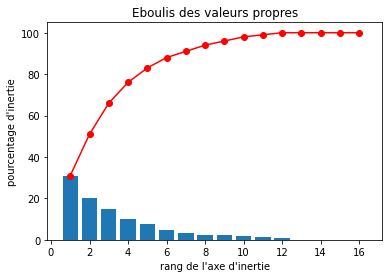

In [188]:
#On peut l'afficher graphiquement
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### Components

In [189]:
#Intéressons nous maintenant à nos fameuses composantes
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = pca.components_
pcs

array([[ 2.73855435e-01, -2.10072083e-01,  3.52348487e-01,
        -1.77952004e-01,  1.49923512e-01,  1.21062327e-01,
         3.52685257e-01,  2.52286281e-01,  9.25398759e-02,
         2.67677795e-01,  2.66637953e-01,  3.52348487e-01,
         2.66637953e-01,  2.52286281e-01,  2.40866721e-01,
        -1.77952003e-01],
       [-1.74170503e-01,  3.47215768e-01, -4.29464422e-02,
         3.50259979e-01,  2.83049341e-01, -7.58363318e-02,
        -8.57812846e-02,  3.94287744e-01,  1.30569149e-01,
        -8.33277640e-02,  2.52441410e-01, -4.29464422e-02,
         2.52441410e-01,  3.94287744e-01, -2.10845059e-01,
         3.50259979e-01],
       [-2.24178937e-01, -2.97843222e-01, -1.20069999e-01,
        -3.74153125e-01,  2.53819724e-01, -4.49549737e-01,
        -1.48175401e-01,  1.83610351e-01, -3.43803949e-01,
        -1.70555000e-01,  8.91887559e-02, -1.20069999e-01,
         8.91887559e-02,  1.83610351e-01, -1.81983974e-01,
        -3.74153125e-01],
       [ 2.43343029e-01, -4.17401821e

In [190]:
# Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.738554e-01,-2.100721e-01,3.523485e-01,-1.779520e-01,1.499235e-01,1.210623e-01,3.526853e-01,2.522863e-01,9.253988e-02,2.676778e-01,2.666380e-01,3.523485e-01,2.666380e-01,2.522863e-01,2.408667e-01,-1.779520e-01
1,-1.741705e-01,3.472158e-01,-4.294644e-02,3.502600e-01,2.830493e-01,-7.583633e-02,-8.578128e-02,3.942877e-01,1.305691e-01,-8.332776e-02,2.524414e-01,-4.294644e-02,2.524414e-01,3.942877e-01,-2.108451e-01,3.502600e-01
2,-2.241789e-01,-2.978432e-01,-1.200700e-01,-3.741531e-01,2.538197e-01,-4.495497e-01,-1.481754e-01,1.836104e-01,-3.438039e-01,-1.705550e-01,8.918876e-02,-1.200700e-01,8.918876e-02,1.836104e-01,-1.819840e-01,-3.741531e-01
3,2.433430e-01,-4.174018e-02,-3.855781e-01,-1.638141e-01,-2.397939e-01,2.604279e-01,6.737985e-02,-9.075405e-03,2.927503e-01,-3.580088e-01,3.489484e-01,-3.855781e-01,3.489484e-01,-9.075405e-03,2.448066e-02,-1.638141e-01
4,3.196858e-01,-1.574686e-01,-1.167203e-01,-1.946277e-02,4.105951e-01,2.525791e-01,2.271096e-01,2.072080e-01,1.604824e-01,-2.494821e-01,-4.170514e-01,-1.167203e-01,-4.170514e-01,2.072080e-01,-1.982587e-01,-1.946276e-02
5,1.020128e-01,-9.507025e-02,-1.905623e-01,2.202633e-01,2.204128e-01,2.085384e-01,1.178202e-01,-1.333338e-02,-6.835101e-01,-6.683359e-02,7.367380e-02,-1.905623e-01,7.367380e-02,-1.333338e-02,4.712532e-01,2.202633e-01
6,-2.749341e-01,1.823115e-01,-1.439262e-01,-1.814588e-01,2.571800e-01,9.149690e-02,-3.306480e-01,9.459901e-02,3.410898e-01,1.836216e-01,-1.200064e-01,-1.439262e-01,-1.200064e-01,9.459901e-02,6.350497e-01,-1.814588e-01
7,-1.070704e-01,-1.044197e-01,-2.830235e-01,-4.049325e-02,-9.569898e-02,3.017413e-01,3.271243e-02,1.025319e-01,-1.157745e-01,7.496819e-01,-1.519221e-03,-2.830235e-01,-1.519221e-03,1.025319e-01,-3.411970e-01,-4.049325e-02
8,2.561605e-01,1.246720e-01,-2.408452e-01,7.360740e-02,1.016677e-01,-6.700734e-01,4.399191e-01,-9.477150e-02,1.786179e-01,2.615321e-01,-1.913454e-02,-2.408452e-01,-1.913454e-02,-9.477150e-02,1.418710e-01,7.360741e-02
9,-5.229328e-01,-1.824995e-01,7.305004e-03,2.730383e-02,4.655074e-01,1.763023e-01,3.768018e-01,-3.239436e-01,1.971419e-01,-5.261190e-02,1.360327e-01,7.305004e-03,1.360327e-01,-3.239436e-01,-1.155710e-01,2.730382e-02


In [191]:
#Intéressant... Mais pas encore très clair... Continuons le travail
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
F1,0.27,-0.21,0.35,-0.18,0.15,0.12,0.35,0.25,0.09,0.27,0.27,0.35,0.27,0.25,0.24,-0.18
F2,-0.17,0.35,-0.04,0.35,0.28,-0.08,-0.09,0.39,0.13,-0.08,0.25,-0.04,0.25,0.39,-0.21,0.35
F3,-0.22,-0.30,-0.12,-0.37,0.25,-0.45,-0.15,0.18,-0.34,-0.17,0.09,-0.12,0.09,0.18,-0.18,-0.37
F4,0.24,-0.04,-0.39,-0.16,-0.24,0.26,0.07,-0.01,0.29,-0.36,0.35,-0.39,0.35,-0.01,0.02,-0.16
F5,0.32,-0.16,-0.12,-0.02,0.41,0.25,0.23,0.21,0.16,-0.25,-0.42,-0.12,-0.42,0.21,-0.20,-0.02
F6,0.10,-0.10,-0.19,0.22,0.22,0.21,0.12,-0.01,-0.68,-0.07,0.07,-0.19,0.07,-0.01,0.47,0.22
F7,-0.27,0.18,-0.14,-0.18,0.26,0.09,-0.33,0.09,0.34,0.18,-0.12,-0.14,-0.12,0.09,0.64,-0.18
F8,-0.11,-0.10,-0.28,-0.04,-0.10,0.30,0.03,0.10,-0.12,0.75,-0.00,-0.28,-0.00,0.10,-0.34,-0.04
F9,0.26,0.12,-0.24,0.07,0.10,-0.67,0.44,-0.09,0.18,0.26,-0.02,-0.24,-0.02,-0.09,0.14,0.07
F10,-0.52,-0.18,0.01,0.03,0.47,0.18,0.38,-0.32,0.20,-0.05,0.14,0.01,0.14,-0.32,-0.12,0.03


In [192]:
#Dans certains cas, on voudra afficher ce dataframe comme cela
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
PIB PPA $ internationaux courants par habitant (2018),0.273855,-0.174171,-0.224179,0.243343,0.319686,0.102013,-0.274934,-0.107070,0.256160,-0.522933,0.425226,0.256209,2.935432e-09,-1.673475e-16,2.566789e-17,2.879359e-17
Continent,-0.210072,0.347216,-0.297843,-0.041740,-0.157469,-0.095070,0.182311,-0.104420,0.124672,-0.182499,-0.347327,0.705264,-7.386226e-09,-1.561667e-16,1.681484e-16,7.088639e-17
Importations – Viande de volaille (en $) - 2018,0.352348,-0.042946,-0.120070,-0.385578,-0.116720,-0.190562,-0.143926,-0.283023,-0.240845,0.007305,0.008949,0.044993,-2.596467e-09,6.891558e-01,-6.306659e-02,-1.452134e-01
Distance (en km),-0.177952,0.350260,-0.374153,-0.163814,-0.019463,0.220263,-0.181459,-0.040493,0.073607,0.027304,0.137740,-0.265005,7.071068e-01,-4.247692e-11,-1.264087e-10,-1.781869e-10
Population Totale (2018),0.149924,0.283049,0.253820,-0.239794,0.410595,0.220413,0.257180,-0.095699,0.101668,0.465507,0.383266,0.330280,-3.014862e-09,2.724886e-16,4.870141e-17,4.748376e-17
Stabilité Politique (2018),0.121062,-0.075836,-0.449550,0.260428,0.252579,0.208538,0.091497,0.301741,-0.670073,0.176302,-0.062417,0.137820,-2.696636e-09,2.732595e-17,7.403518e-17,-9.249781e-17
Indice de performance logistique - performance globale (2018),0.352685,-0.085781,-0.148175,0.067380,0.227110,0.117820,-0.330648,0.032712,0.439919,0.376802,-0.574527,-0.017603,2.593091e-09,2.515477e-16,-2.961034e-17,7.317387e-17
Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,0.252286,0.394288,0.183610,-0.009075,0.207208,-0.013333,0.094599,0.102532,-0.094772,-0.323944,-0.201569,-0.173112,1.562770e-09,-1.274192e-01,-6.058824e-01,-3.415712e-01
Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,0.092540,0.130569,-0.343804,0.292750,0.160482,-0.683510,0.341090,-0.115775,0.178618,0.197142,0.153832,-0.231006,-1.031223e-10,5.942715e-17,-5.109339e-17,3.745004e-17
Importations Poulet en boite – Quantité (en Tonnes) – 2018,0.267678,-0.083328,-0.170555,-0.358009,-0.249482,-0.066834,0.183622,0.749682,0.261532,-0.052612,0.167692,0.049095,2.410611e-09,-2.770545e-17,-1.216692e-17,4.293947e-18


<AxesSubplot:>

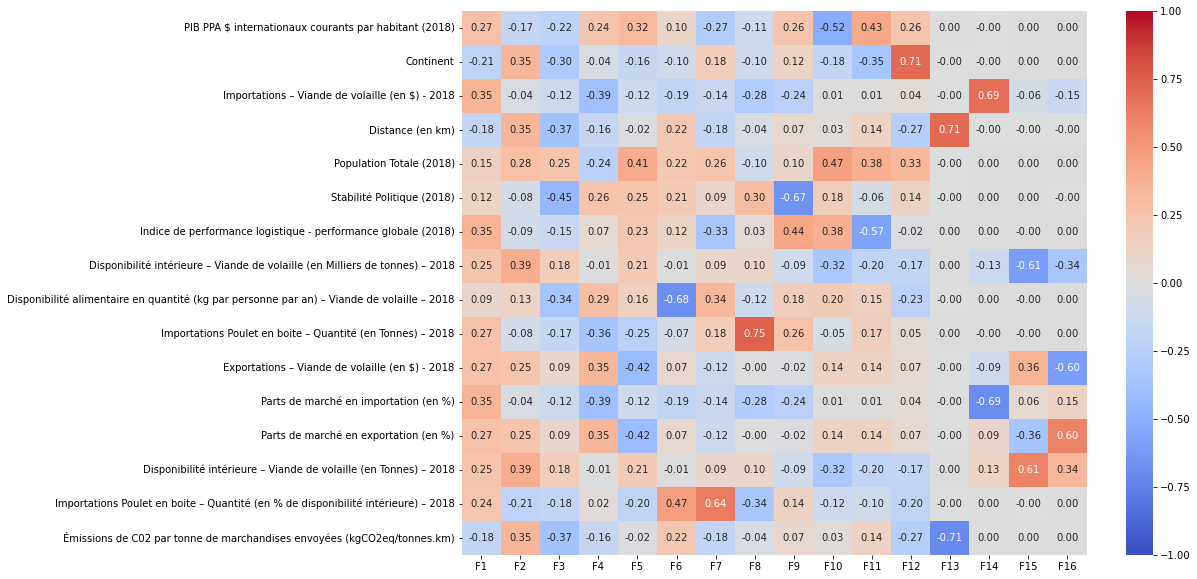

In [193]:
#Et pour une représentation visuelle comme cela
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Cercle des corrélations

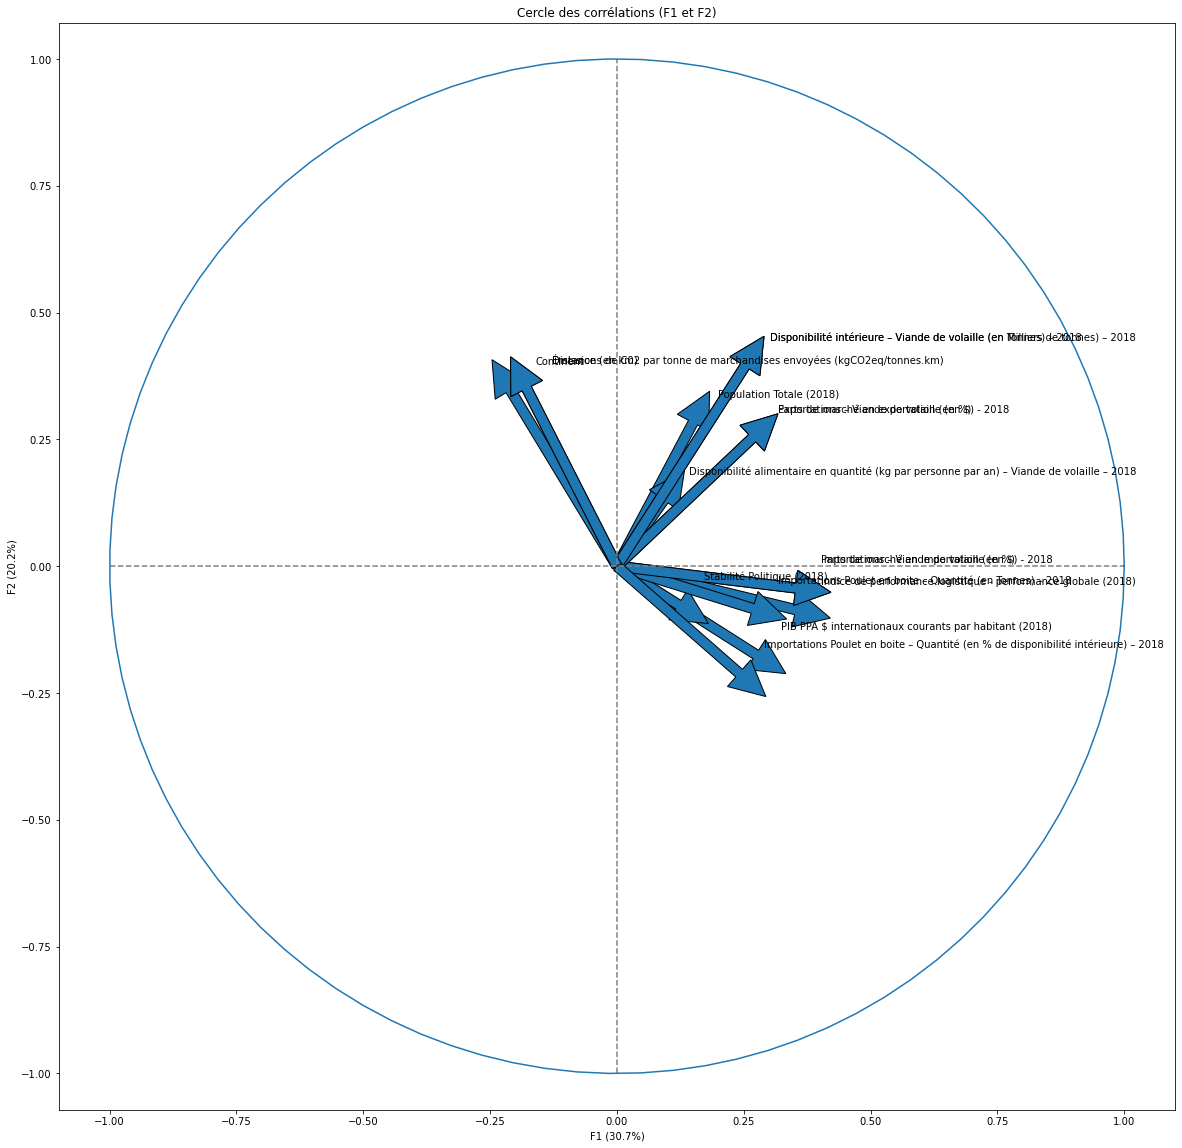

In [194]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 0,1

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

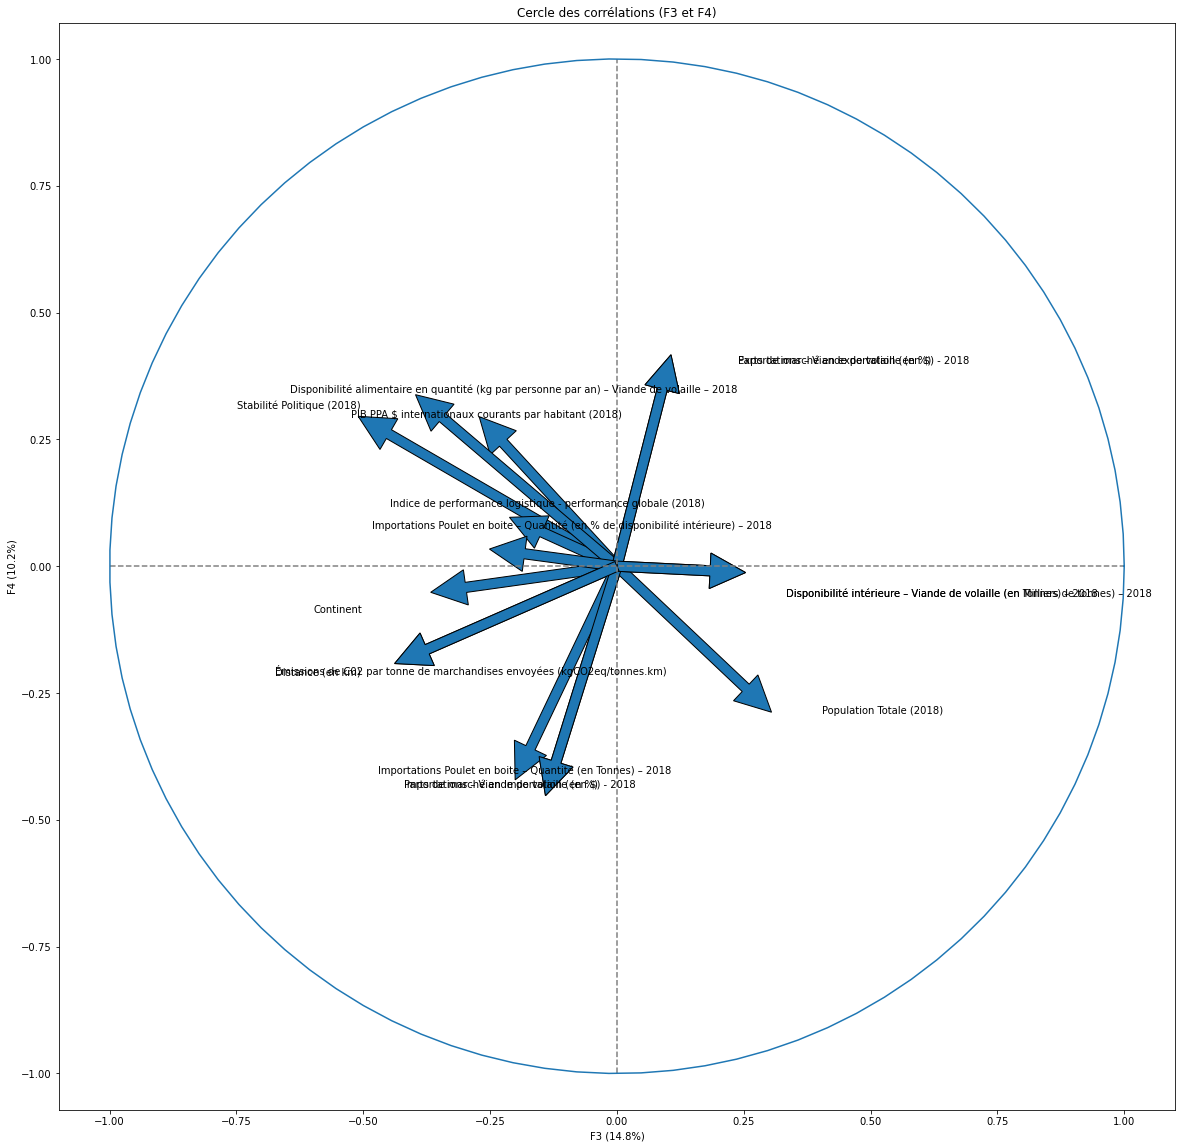

In [195]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 2,3

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
     # Les labels
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] - 0.05,
            features[i])
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] - 0.05,
            features[i])
    
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

#### Projection

In [196]:
#Travaillons maintenant sur la projection de nos individus. 
#Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)


In [197]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None :
        for i,(x,y) in enumerate(X_projected[:,[0,1]]):
            plt.text(x, y, labels[i], fontsize='13')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


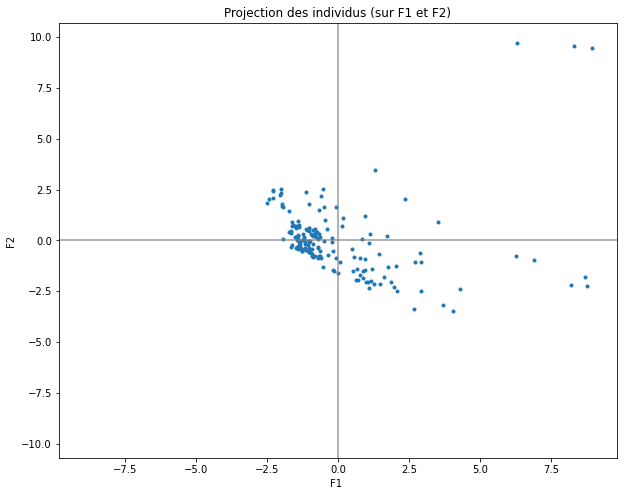

In [198]:
#Essayons la version simple avec F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y)

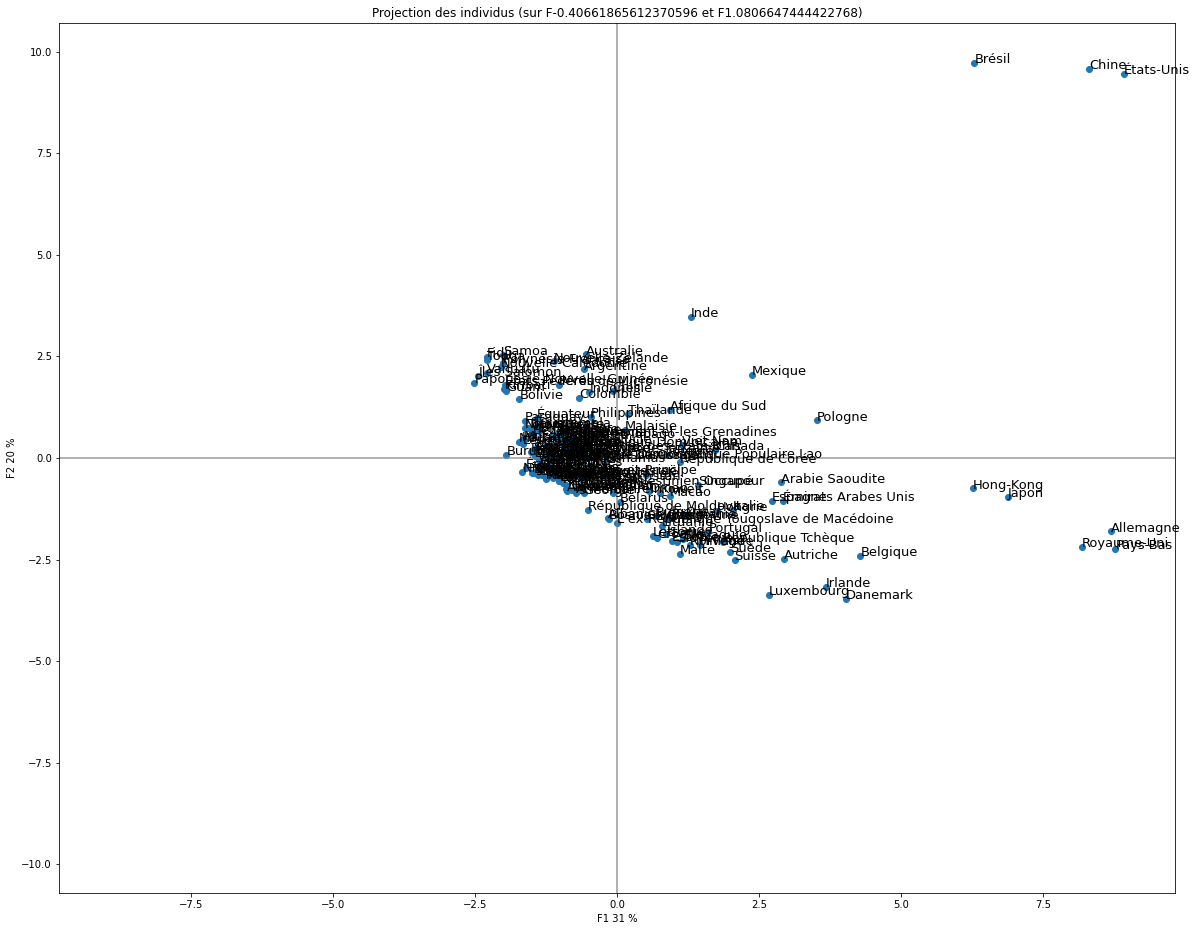

In [199]:
#Essayons la version plus élaborée avec F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

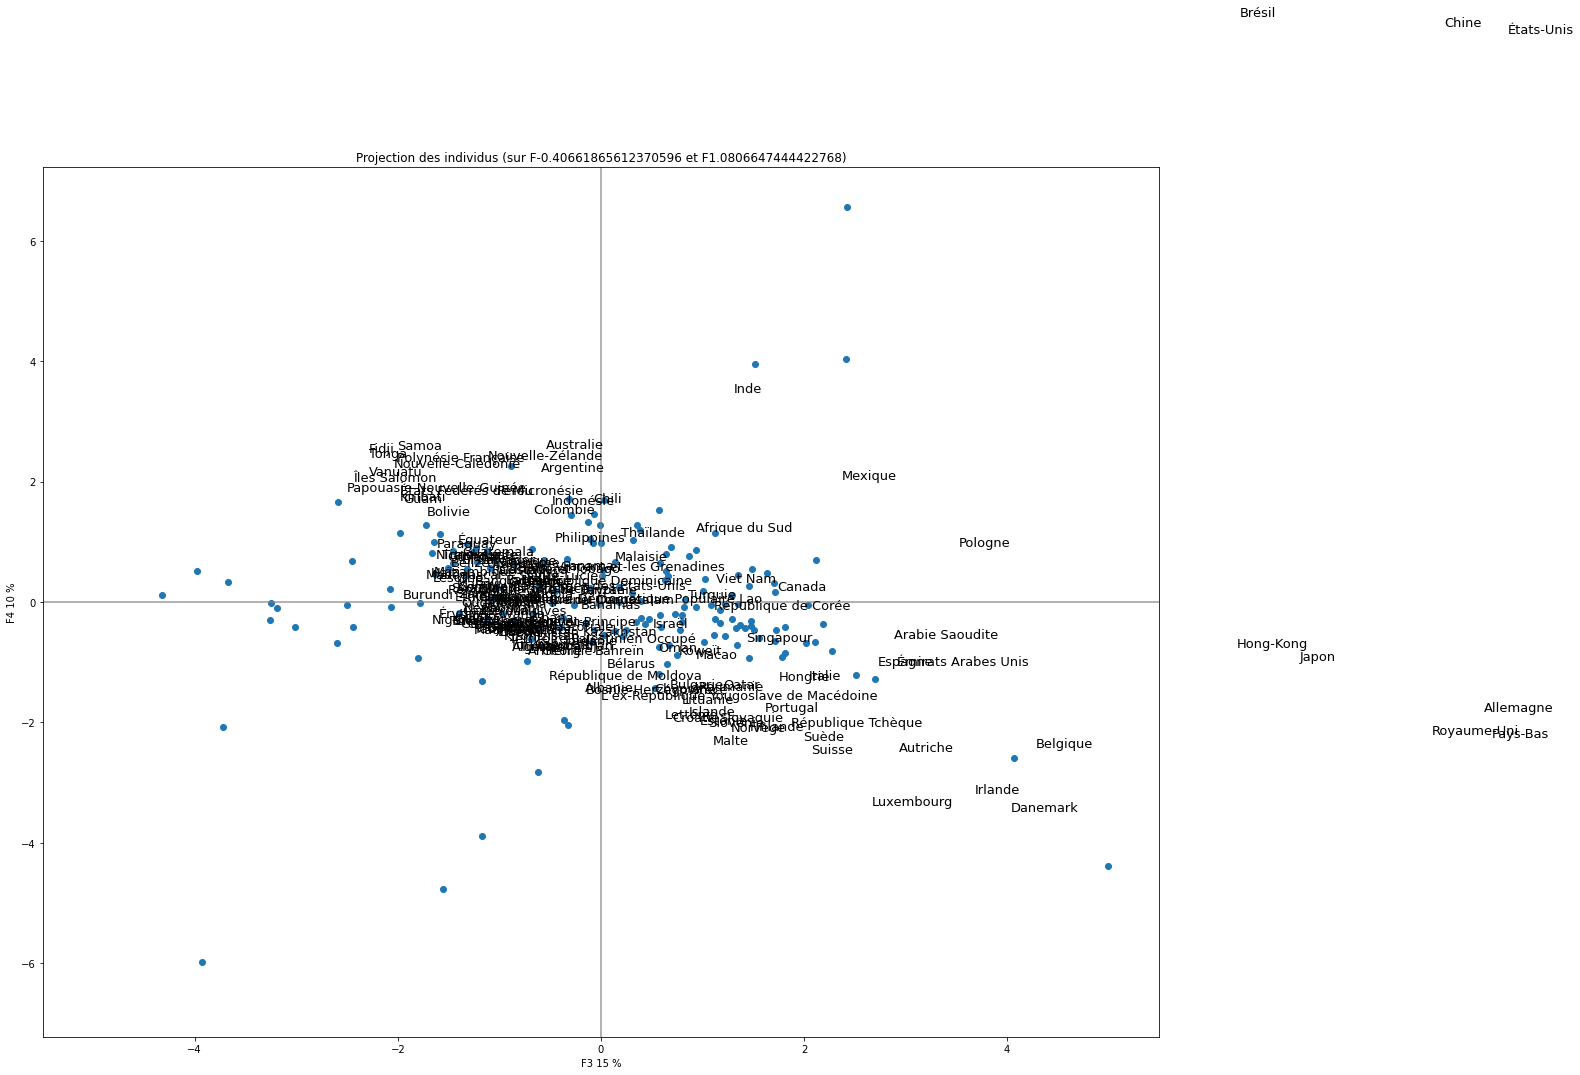

In [200]:
#Essayons maintenant avec F3 et F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

#### Exclusion des outliers (Chine et Inde)

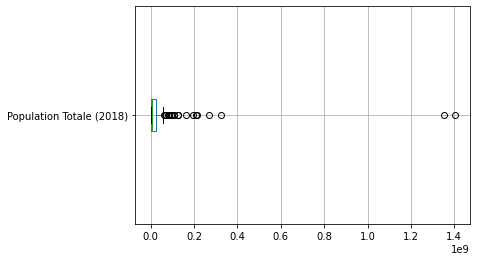

In [201]:
#On représente les valeurs atypiques à l'aide d'un box plot
df_complet.boxplot(column="Population Totale (2018)", vert=False)
plt.show()

In [202]:
df_pop_desc = df_complet.sort_values(by = 'Population Totale (2018)', ascending = False)
df_pop_desc.head()

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Pays (FR),,,,,,,,,,,,,,,,
Chine,15495.548422,2,1.058302e+09,8225.232422,1402760000,-0.300023,3.61,20746.0,14.47,568.0,5.708674e+08,3.905172,2.106522,20746000.0,0.002738,27348.898438
Inde,6669.622784,2,6.846690e+05,6594.229980,1352642283,-0.987013,3.18,4094.0,3.03,17.0,1.015859e+07,0.002526,0.037486,4094000.0,0.000415,21925.814453
États-Unis,62805.253758,4,2.810518e+08,5838.157227,326838199,0.421418,3.89,18645.0,56.92,49432.0,3.679564e+09,1.037092,13.577728,18645000.0,0.265122,19411.873047
Indonésie,11643.397318,2,4.648480e+06,11584.250000,267670549,-0.545908,3.15,2115.0,7.90,82.0,6.483900e+04,0.017153,0.000239,2115000.0,0.003877,38517.632812
Pakistan,5420.695792,2,1.873700e+07,5932.585938,212228288,-2.269401,2.42,1048.0,4.94,792.0,6.410813e+06,0.069140,0.023656,1048000.0,0.075573,19725.847656


### 2ème Analyse en Composante Principale (sans les pays exclus)

#### Préparation à l'Analyse en Composante Principale

In [203]:
#On va passer "Continent" en variable quantitative pour réaliser l'ACP
df_exclu['Continent'] = df_exclu['Continent'].str.replace('Europe','1')
df_exclu['Continent'] = df_exclu['Continent'].str.replace('Asia','2')
df_exclu['Continent'] = df_exclu['Continent'].str.replace('Africa','3')
df_exclu['Continent'] = df_exclu['Continent'].str.replace('North America','4')
df_exclu['Continent'] = df_exclu['Continent'].str.replace('South America','5')
df_exclu['Continent'] = df_exclu['Continent'].str.replace('Oceania','6')
df_exclu['Continent'] = pd.to_numeric(df_exclu['Continent'], downcast="integer")
#On a donc 1=Europe, 2=Asia, 3=Africa, 4=North America, 5=South America, 6=Oceania
#On vérifie que la conversion s'est bien faite
df_exclu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 1 to 240
Data columns (total 17 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Pays (FR)                                                                                   167 non-null    object 
 1   PIB PPA $ internationaux courants par habitant (2018)                                       167 non-null    float64
 2   Continent                                                                                   167 non-null    int8   
 3   Importations – Viande de volaille (en $) - 2018                                             167 non-null    float64
 4   Distance (en km)                                                                            167 non-null    float32
 5   Population Totale (2018)                   

C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/1637327250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclu['Continent'] = df_exclu['Continent'].str.replace('Europe','1')
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/1637327250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclu['Continent'] = df_exclu['Continent'].str.replace('Asia','2')
C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/1637327250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [204]:
#On vérifie cette encodage
df_exclu.head()

,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
1,Albanie,13498.138167,1,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
3,Algérie,11908.537607,3,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
6,Angola,7148.933253,3,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
8,Azerbaïdjan,14549.061897,2,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727
9,Argentine,23290.675739,5,13556901.0,11072.250000,44494502,0.010891,2.89,1963.0,44.25,5175.0,272156574.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


In [205]:
#On définit les noms des pays en index et on revérifie
df_exclu.set_index('Pays (FR)', inplace = True)
df_exclu.head()

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Pays (FR),,,,,,,,,,,,,,,,
Albanie,13498.138167,1,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
Algérie,11908.537607,3,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
Angola,7148.933253,3,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
Azerbaïdjan,14549.061897,2,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727
Argentine,23290.675739,5,13556901.0,11072.250000,44494502,0.010891,2.89,1963.0,44.25,5175.0,272156574.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


#### Data Split

In [206]:
#On va séparer nos données
X = df_exclu.values
print(X)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print(X.shape)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
names = df_exclu.index
print(names)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
features = df_exclu.columns
print(features)


[[1.34981382e+04 1.00000000e+00 3.78814010e+07 ... 2.70000000e+04
  6.00000000e-01 5.33175098e+03]
 [1.19085376e+04 3.00000000e+00 2.57300000e+04 ... 2.86000000e+05
  3.63636364e-02 4.45679688e+03]
 [7.14893325e+03 3.00000000e+00 3.62542813e+08 ... 3.76000000e+05
  6.83510638e-02 2.16468203e+04]
 ...
 [7.25213735e+03 2.00000000e+00 9.25356300e+06 ... 7.60000000e+04
  9.60526316e-02 1.71339375e+04]
 [6.53341593e+03 6.00000000e+00 1.71807360e+07 ... 1.60000000e+04
  1.50000000e-01 5.32396328e+04]
 [3.60567610e+03 3.00000000e+00 7.81086100e+06 ... 5.90000000e+04
  3.38983051e-03 2.52860957e+04]]
--------------------------------------------------------
--------------------------------------------------------
(167, 16)
--------------------------------------------------------
--------------------------------------------------------
Index(['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Bahreïn', 'Bangladesh',
       ...
       'Égypte',

#### Scaling

In [207]:
#Commençons par scaler les données

scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [208]:
#On transforme
X_scaled = scaler.transform(X)

#Rappelons qu'on peut faire les 2 opérations en une seule :
X_scaled = scaler.fit_transform(X)

#On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### PCA

In [209]:
#On va travailler sur les 12 premières composantes
n_components = 12

#On instancie notre ACP
pca = PCA(n_components=n_components)

#On l'entraîne sur nos données scalées
pca.fit(X_scaled)



PCA(n_components=12)

#### Explained variance & scree plot

In [210]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante
#Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_
pca.explained_variance_ratio_

array([0.31937972, 0.21913691, 0.14957852, 0.10119415, 0.05537838,
       0.04448299, 0.03018389, 0.02474707, 0.01851288, 0.01487577,
       0.01346143, 0.00906828])

Ici la 1ère composante capte 31% de la variance de nos données initiales, la 2ème 21% etc etc.

In [211]:
#Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([31.94, 21.91, 14.96, 10.12,  5.54,  4.45,  3.02,  2.47,  1.85,
        1.49,  1.35,  0.91])

In [212]:
#On fait une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 32.,  54.,  69.,  79.,  84.,  89.,  92.,  94.,  96.,  98.,  99.,
       100.])

In [213]:
#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

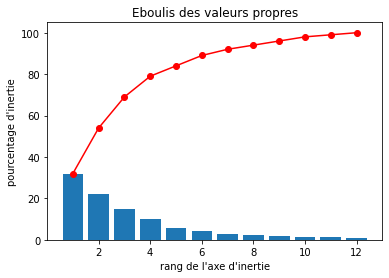

In [214]:
#On peut l'afficher graphiquement
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 5 premières composantes, et près de 90% dans les 7 premières.

#### Components

In [215]:
#Intéressons nous maintenant à nos fameuses composantes
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = pca.components_
pcs

array([[ 0.25927359, -0.17270108,  0.32065002, -0.1560041 ,  0.21473974,
         0.10522001,  0.33095646,  0.28747578,  0.11083996,  0.26372397,
         0.30594168,  0.32065002,  0.30594168,  0.28747578,  0.21818897,
        -0.1560041 ],
       [-0.193698  ,  0.34963435, -0.14436108,  0.31764467,  0.28982204,
        -0.1126893 , -0.14375758,  0.35787994,  0.12171229, -0.11207465,
         0.26409574, -0.14436108,  0.26409574,  0.35787994, -0.2374334 ,
         0.31764467],
       [ 0.19500428,  0.3145147 ,  0.15920794,  0.41247623, -0.21568158,
         0.43946059,  0.15310594, -0.10865213,  0.32881029,  0.16035155,
        -0.11576873,  0.15920794, -0.11576873, -0.10865213,  0.15734177,
         0.41247623],
       [-0.32438418,  0.08732865,  0.39168876,  0.16179848,  0.21974164,
        -0.37377539, -0.12496824, -0.05754169, -0.31505815,  0.40368767,
        -0.16576555,  0.39168876, -0.16576555, -0.05754169, -0.0231421 ,
         0.16179848],
       [-0.24699143,  0.11819489, -0

In [216]:
# Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.259274,-0.172701,0.320650,-0.156004,0.214740,0.105220,0.330956,0.287476,0.110840,0.263724,0.305942,0.320650,0.305942,0.287476,0.218189,-0.156004
1,-0.193698,0.349634,-0.144361,0.317645,0.289822,-0.112689,-0.143758,0.357880,0.121712,-0.112075,0.264096,-0.144361,0.264096,0.357880,-0.237433,0.317645
2,0.195004,0.314515,0.159208,0.412476,-0.215682,0.439461,0.153106,-0.108652,0.328810,0.160352,-0.115769,0.159208,-0.115769,-0.108652,0.157342,0.412476
3,-0.324384,0.087329,0.391689,0.161798,0.219742,-0.373775,-0.124968,-0.057542,-0.315058,0.403688,-0.165766,0.391689,-0.165766,-0.057542,-0.023142,0.161798
4,-0.246991,0.118195,-0.035039,0.047469,-0.279360,0.053255,-0.212928,-0.175074,-0.301523,0.029567,0.417068,-0.035039,0.417068,-0.175074,0.539317,0.047469
5,0.294550,-0.187318,-0.188817,0.257690,0.304690,0.142164,0.304597,0.027311,-0.658952,-0.061224,-0.072562,-0.188817,-0.072562,0.027311,0.135004,0.257690
6,-0.101226,0.106610,-0.316904,-0.113107,0.216789,0.036803,-0.147403,0.163468,0.177396,0.495423,-0.230944,-0.316904,-0.230944,0.163468,0.494812,-0.113107
7,-0.211052,-0.147083,-0.041659,-0.055058,-0.256664,0.564499,-0.161579,0.140732,-0.274097,0.431337,0.038759,-0.041659,0.038759,0.140732,-0.458095,-0.055058
8,0.141087,0.069018,0.227366,-0.054192,-0.083211,0.217901,-0.507704,0.309271,-0.194367,-0.424426,-0.201946,0.227366,-0.201946,0.309271,0.251238,-0.054192
9,-0.566975,-0.345646,0.073149,0.037865,0.452158,0.415073,0.054612,-0.116393,0.203614,-0.284355,-0.023313,0.073149,-0.023313,-0.116393,0.123636,0.037865


In [217]:
#Intéressant... Mais pas encore très clair... Continuons le travail
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
F1,0.26,-0.17,0.32,-0.16,0.21,0.11,0.33,0.29,0.11,0.26,0.31,0.32,0.31,0.29,0.22,-0.16
F2,-0.19,0.35,-0.14,0.32,0.29,-0.11,-0.14,0.36,0.12,-0.11,0.26,-0.14,0.26,0.36,-0.24,0.32
F3,0.20,0.31,0.16,0.41,-0.22,0.44,0.15,-0.11,0.33,0.16,-0.12,0.16,-0.12,-0.11,0.16,0.41
F4,-0.32,0.09,0.39,0.16,0.22,-0.37,-0.12,-0.06,-0.32,0.40,-0.17,0.39,-0.17,-0.06,-0.02,0.16
F5,-0.25,0.12,-0.04,0.05,-0.28,0.05,-0.21,-0.18,-0.30,0.03,0.42,-0.04,0.42,-0.18,0.54,0.05
F6,0.29,-0.19,-0.19,0.26,0.30,0.14,0.30,0.03,-0.66,-0.06,-0.07,-0.19,-0.07,0.03,0.14,0.26
F7,-0.10,0.11,-0.32,-0.11,0.22,0.04,-0.15,0.16,0.18,0.50,-0.23,-0.32,-0.23,0.16,0.49,-0.11
F8,-0.21,-0.15,-0.04,-0.06,-0.26,0.56,-0.16,0.14,-0.27,0.43,0.04,-0.04,0.04,0.14,-0.46,-0.06
F9,0.14,0.07,0.23,-0.05,-0.08,0.22,-0.51,0.31,-0.19,-0.42,-0.20,0.23,-0.20,0.31,0.25,-0.05
F10,-0.57,-0.35,0.07,0.04,0.45,0.42,0.05,-0.12,0.20,-0.28,-0.02,0.07,-0.02,-0.12,0.12,0.04


In [218]:
#Dans certains cas, on voudra afficher ce dataframe comme cela
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
PIB PPA $ internationaux courants par habitant (2018),0.259274,-0.193698,0.195004,-0.324384,-0.246991,0.294550,-0.101226,-0.211052,0.141087,-0.566975,0.422914,0.170967
Continent,-0.172701,0.349634,0.314515,0.087329,0.118195,-0.187318,0.106610,-0.147083,0.069018,-0.345646,-0.395576,0.615315
Importations – Viande de volaille (en $) - 2018,0.320650,-0.144361,0.159208,0.391689,-0.035039,-0.188817,-0.316904,-0.041659,0.227366,0.073149,-0.013641,0.036074
Distance (en km),-0.156004,0.317645,0.412476,0.161798,0.047469,0.257690,-0.113107,-0.055058,-0.054192,0.037865,0.143721,-0.262566
Population Totale (2018),0.214740,0.289822,-0.215682,0.219742,-0.279360,0.304690,0.216789,-0.256664,-0.083211,0.452158,0.266739,0.456960
Stabilité Politique (2018),0.105220,-0.112689,0.439461,-0.373775,0.053255,0.142164,0.036803,0.564499,0.217901,0.415073,-0.013685,0.283517
Indice de performance logistique - performance globale (2018),0.330956,-0.143758,0.153106,-0.124968,-0.212928,0.304597,-0.147403,-0.161579,-0.507704,0.054612,-0.615353,-0.073378
Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,0.287476,0.357880,-0.108652,-0.057542,-0.175074,0.027311,0.163468,0.140732,0.309271,-0.116393,-0.184386,-0.230315
Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,0.110840,0.121712,0.328810,-0.315058,-0.301523,-0.658952,0.177396,-0.274097,-0.194367,0.203614,0.180692,-0.148000
Importations Poulet en boite – Quantité (en Tonnes) – 2018,0.263724,-0.112075,0.160352,0.403688,0.029567,-0.061224,0.495423,0.431337,-0.424426,-0.284355,0.179075,-0.005605


<AxesSubplot:>

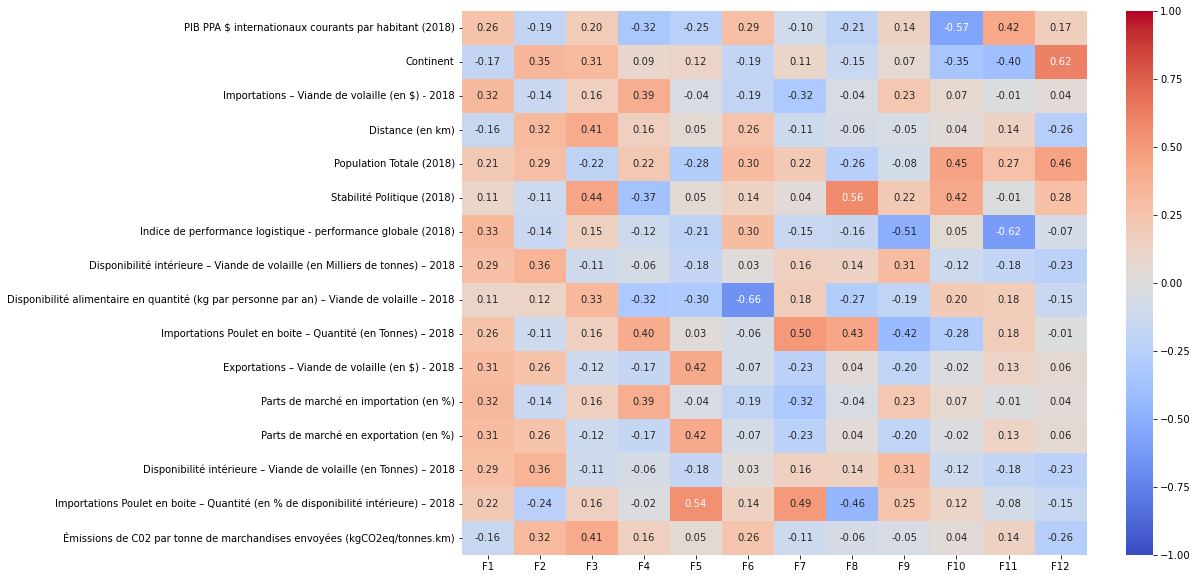

In [219]:
#Et pour une représentation visuelle comme cela
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Cercle des corrélations

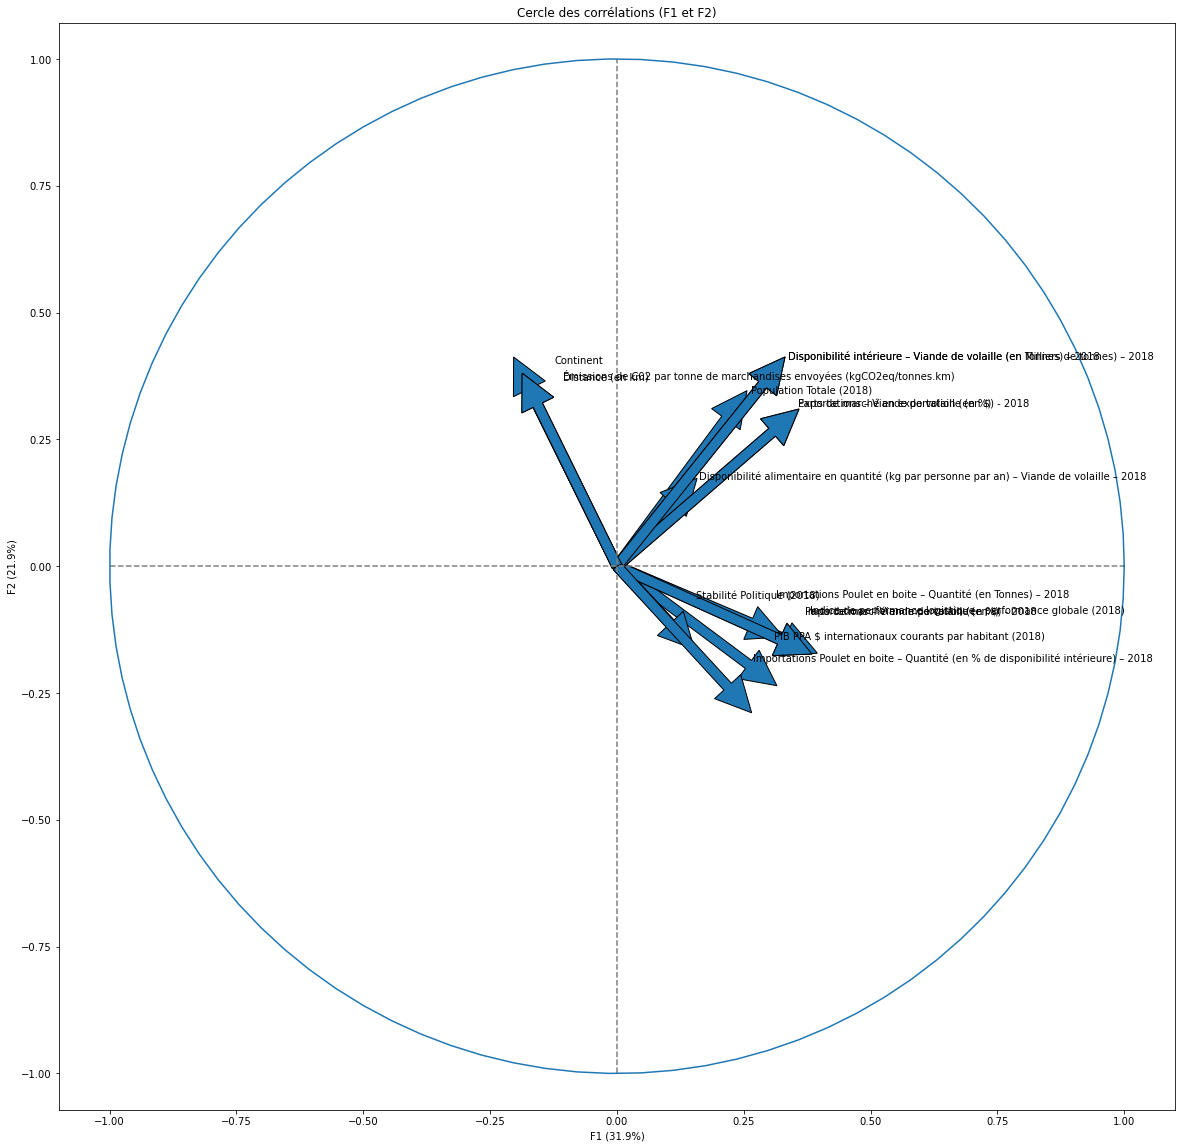

In [220]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 0,1

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

F1 semble être lié à la facilité à commercer le poulet dans le monde tandis que F2 semble être lié à la position géographique.

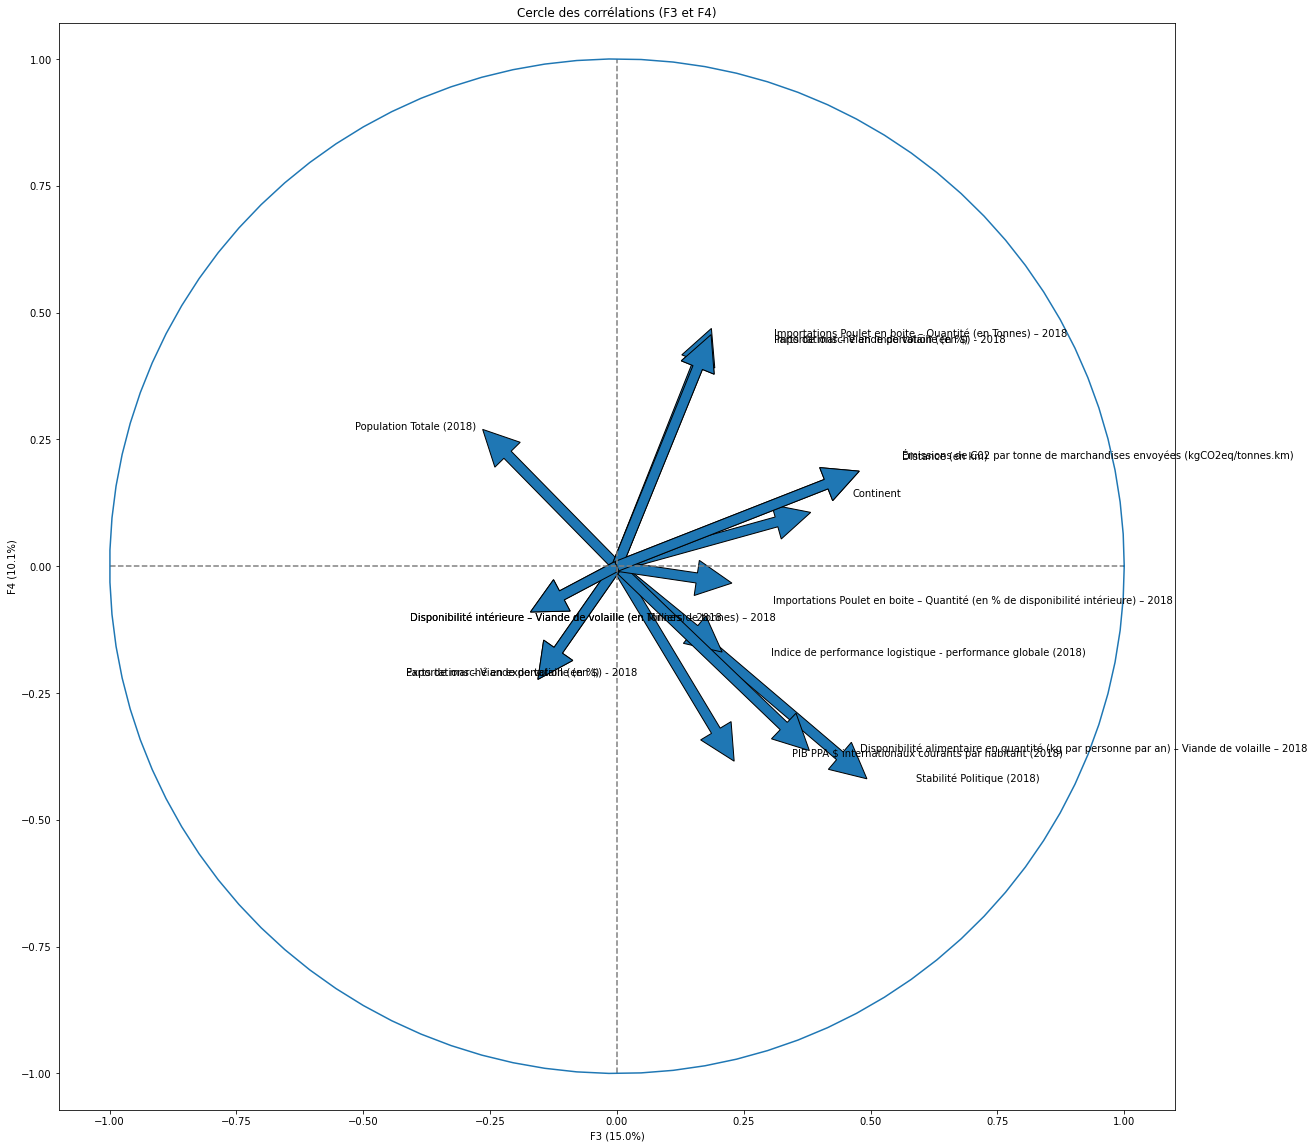

In [221]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 2,3

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
     # Les labels
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] - 0.05,
            features[i])
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] - 0.05,
            features[i])
    
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

F3 semble être lié aux obstacles à l'exportation tandis que F4 semble être lié à la facilité à importer.

#### Projection

In [222]:
#Travaillons maintenant sur la projection de nos dimensions. 
#Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
#Rappelons que

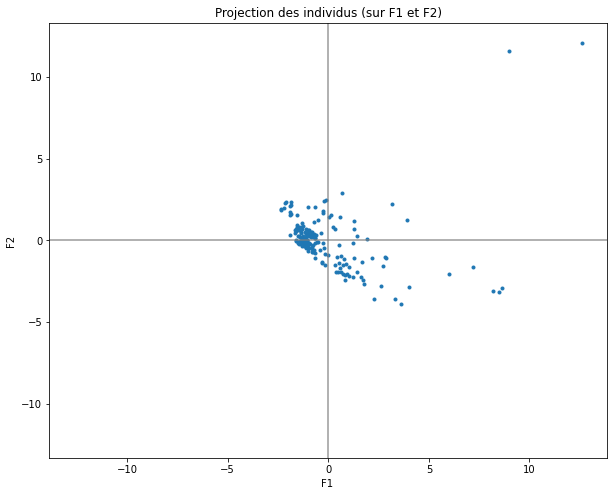

In [223]:
#Essayons la version simple avec F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y)

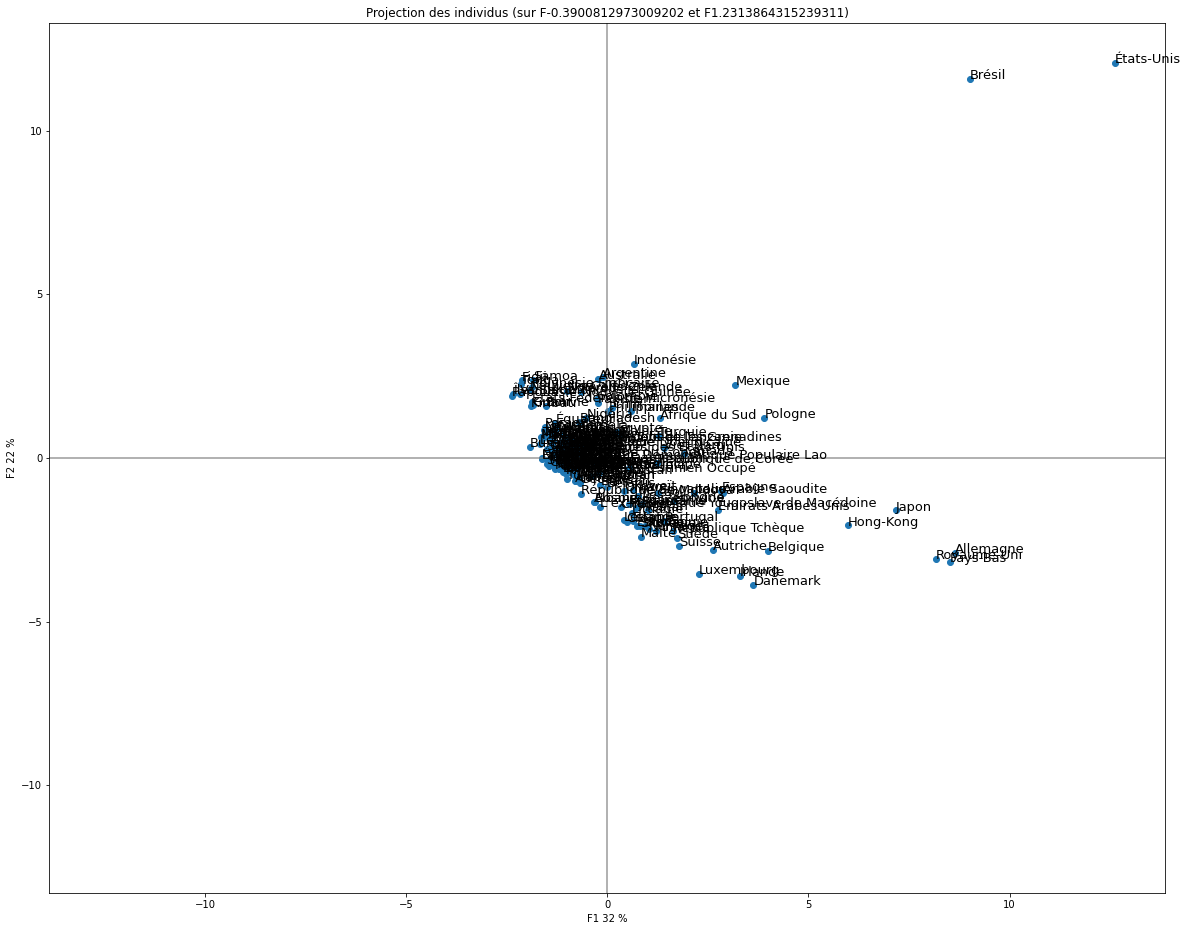

In [224]:
#Essayons la version plus élaborée avec F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

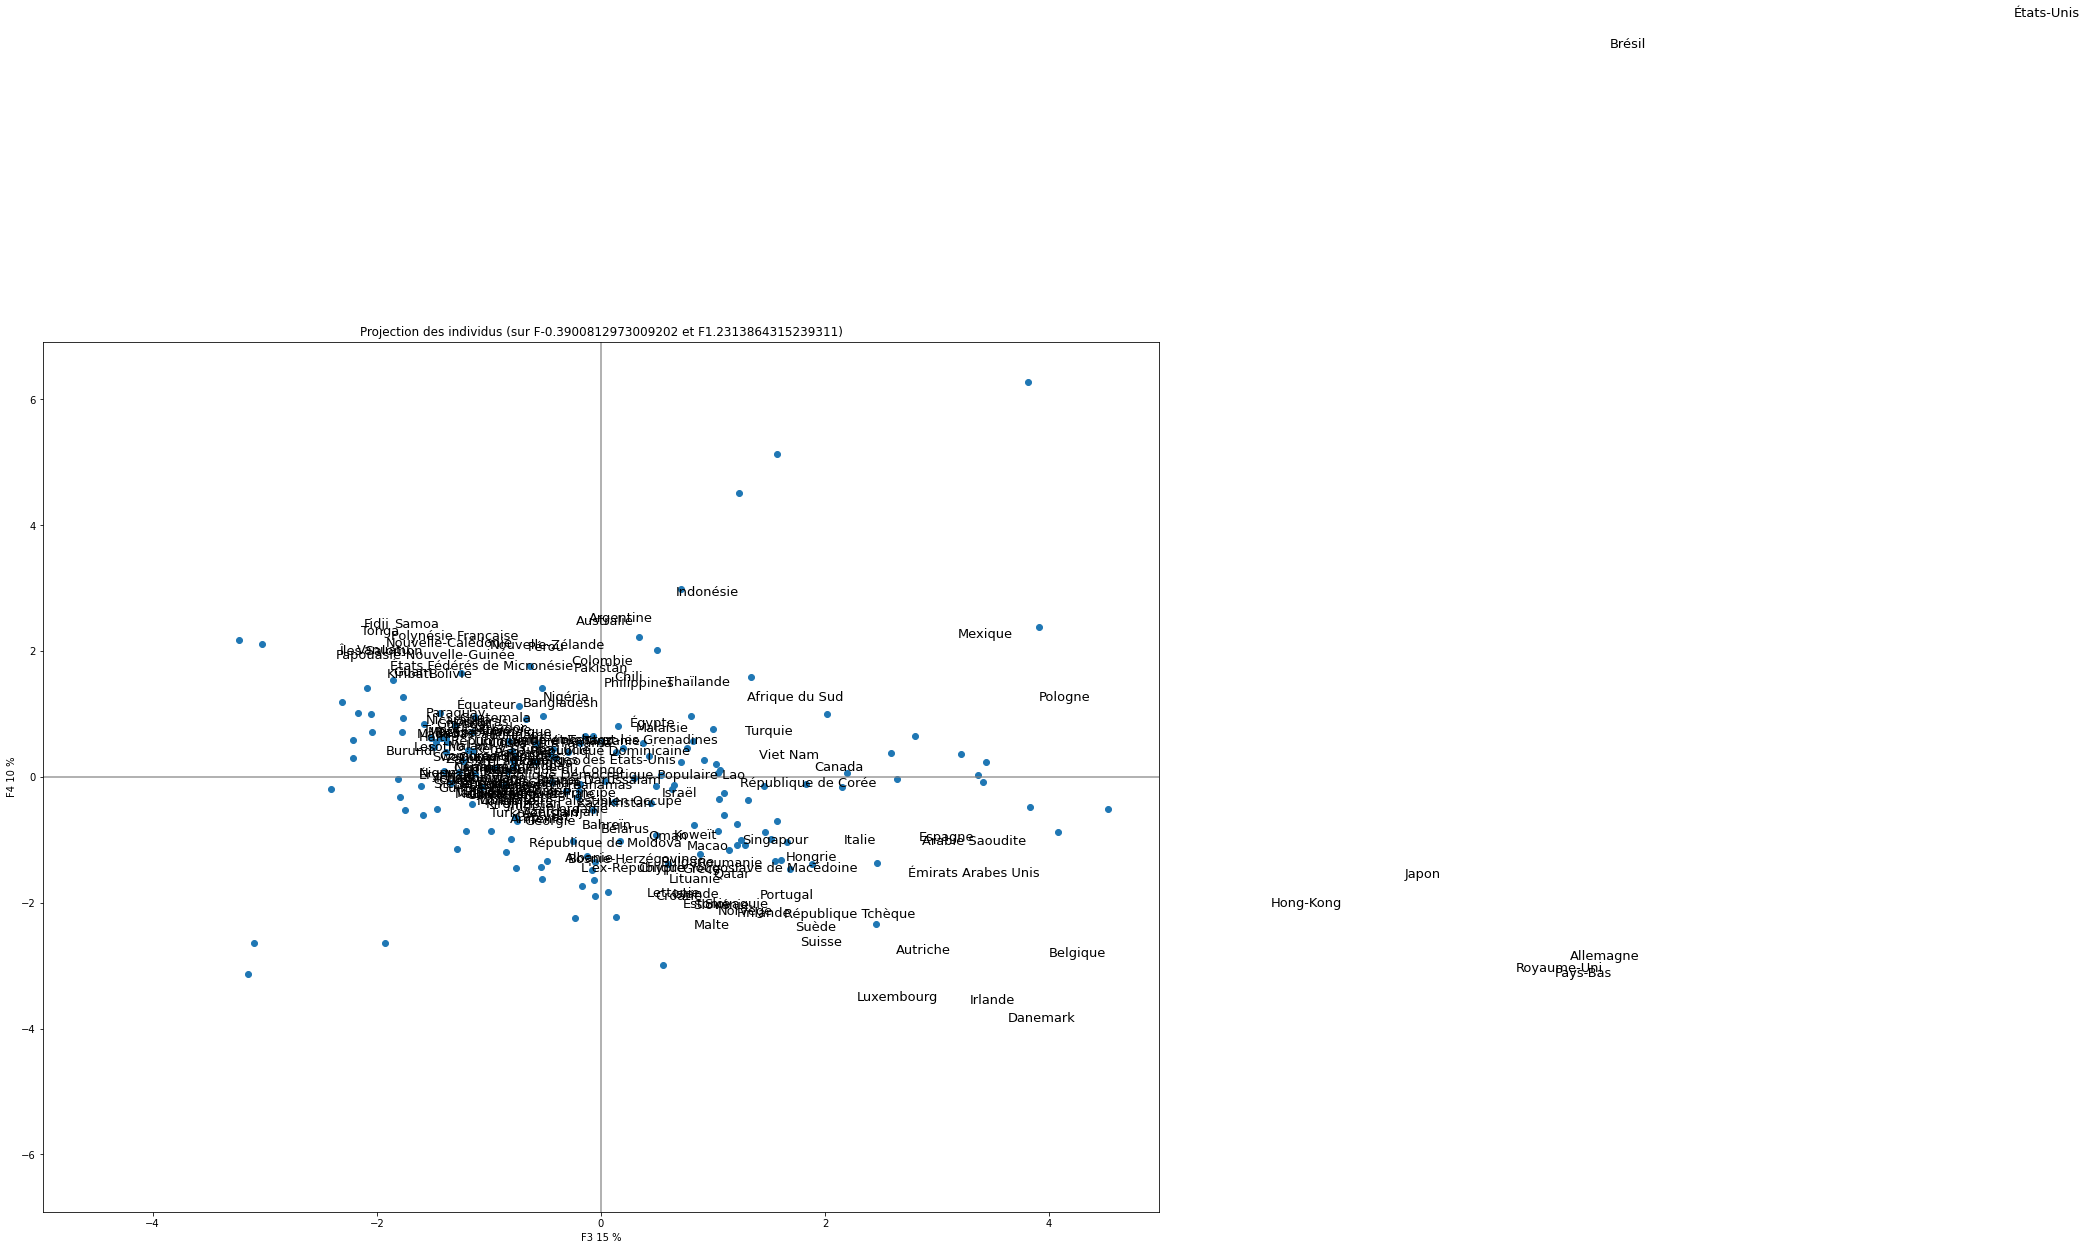

In [225]:
#Essayons maintenant avec F3 et F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

#### Sélection des variables les plus pertinentes pour faciliter l'analyse

In [226]:
#On affiche la matrice de corrélations entre les variables
corr = df_exclu.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nic_9\AppData\Local\Temp/ipykernel_4016/4191969920.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
PIB PPA $ internationaux courants par habitant (2018),1.00,-0.39,0.38,-0.26,-0.02,0.55,0.72,0.15,0.30,0.25,0.17,0.38,0.17,0.15,0.44,-0.26
Continent,-0.39,1.00,-0.27,0.79,-0.03,-0.00,-0.40,0.08,0.29,-0.18,-0.03,-0.27,-0.03,0.08,-0.29,0.79
Importations – Viande de volaille (en $) - 2018,0.38,-0.27,1.00,-0.18,0.21,0.15,0.55,0.20,0.11,0.70,0.24,1.00,0.24,0.20,0.44,-0.18
Distance (en km),-0.26,0.79,-0.18,1.00,0.03,0.13,-0.25,0.03,0.17,-0.11,-0.09,-0.18,-0.09,0.03,-0.26,1.00
Population Totale (2018),-0.02,-0.03,0.21,0.03,1.00,-0.34,0.19,0.72,-0.03,0.21,0.47,0.21,0.47,0.72,-0.10,0.03
Stabilité Politique (2018),0.55,-0.00,0.15,0.13,-0.34,1.00,0.42,-0.04,0.41,0.15,0.04,0.15,0.04,-0.04,0.36,0.13
Indice de performance logistique - performance globale (2018),0.72,-0.40,0.55,-0.25,0.19,0.42,1.00,0.27,0.24,0.43,0.31,0.55,0.31,0.27,0.45,-0.25
Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,0.15,0.08,0.20,0.03,0.72,-0.04,0.27,1.00,0.27,0.19,0.72,0.20,0.72,1.00,-0.06,0.03
Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,0.30,0.29,0.11,0.17,-0.03,0.41,0.24,0.27,1.00,0.06,0.19,0.11,0.19,0.27,0.03,0.17
Importations Poulet en boite – Quantité (en Tonnes) – 2018,0.25,-0.18,0.70,-0.11,0.21,0.15,0.43,0.19,0.06,1.00,0.15,0.70,0.15,0.19,0.44,-0.11


In [227]:
df_exclu.head()

,PIB PPA $ internationaux courants par habitant (2018),Continent,Importations – Viande de volaille (en $) - 2018,Distance (en km),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018,Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Exportations – Viande de volaille (en $) - 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Pays (FR),,,,,,,,,,,,,,,,
Albanie,13498.138167,1,37881401.0,1603.534058,2866376,0.370516,2.66,27.0,9.48,162.0,106888476.0,0.139784,0.394422,27000.0,0.600000,5331.750977
Algérie,11908.537607,3,25730.0,1340.390015,42228415,-0.836120,2.45,286.0,6.76,104.0,395651.0,0.000095,0.001460,286000.0,0.036364,4456.796875
Angola,7148.933253,3,362542813.0,6510.321777,30809787,-0.335692,2.05,376.0,12.22,257.0,256232.0,1.337796,0.000946,376000.0,0.068351,21646.820312
Azerbaïdjan,14549.061897,2,36412945.0,3817.547119,9939771,-0.706760,2.72,138.0,13.87,1113.0,1297828.0,0.134365,0.004789,138000.0,0.806522,12693.344727
Argentine,23290.675739,5,13556901.0,11072.250000,44494502,0.010891,2.89,1963.0,44.25,5175.0,272156574.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


In [228]:
#On enlève donc pour la suite de l'analyse, les variables Distance (en km),Importations – Viande de volaille (en $) - 2018, 
#Disponibilité intérieure – Viande de volaille (en Milliers de tonnes) – 2018, Exportations (en $), Continent,
#qui sont corrélées aux nouvelles variables créées.
df_exclu.drop(df_exclu.columns[[1, 2, 3, 7, 10]], axis=1, inplace=True)
df_exclu.head()




C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Pays (FR),,,,,,,,,,,
Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.750977
Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.796875
Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820312
Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.344727
Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230469


### 3ème Analyse en Composante Principale (sans les pays et variables exclus)

#### Data Split

In [229]:
#On va séparer nos données
X = df_exclu.values
print(X)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print(X.shape)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
names = df_exclu.index
print(names)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
features = df_exclu.columns
print(features)

[[ 1.34981382e+04  2.86637600e+06  3.70515600e-01 ...  2.70000000e+04
   6.00000000e-01  5.33175098e+03]
 [ 1.19085376e+04  4.22284150e+07 -8.36119600e-01 ...  2.86000000e+05
   3.63636364e-02  4.45679688e+03]
 [ 7.14893325e+03  3.08097870e+07 -3.35691800e-01 ...  3.76000000e+05
   6.83510638e-02  2.16468203e+04]
 ...
 [ 7.25213735e+03  3.29561000e+07 -2.95807200e-01 ...  7.60000000e+04
   9.60526316e-02  1.71339375e+04]
 [ 6.53341593e+03  1.96128000e+05  1.16780400e+00 ...  1.60000000e+04
   1.50000000e-01  5.32396328e+04]
 [ 3.60567610e+03  1.73517140e+07  8.56044000e-02 ...  5.90000000e+04
   3.38983051e-03  2.52860957e+04]]
--------------------------------------------------------
--------------------------------------------------------
(167, 11)
--------------------------------------------------------
--------------------------------------------------------
Index(['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Bahreïn', 'Bang

#### Scaling

In [230]:
#Commençons par scaler les données

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [231]:
#On transforme
X_scaled = scaler.transform(X)

#Rappelons qu'on peut faire les 2 opérations en une seule :
X_scaled = scaler.fit_transform(X)

#On espère avoir une moyenne à 0 et un écart type à 1 :
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### PCA

In [232]:
#On va travailler sur les 11 premières composantes
n_components = 11

#On instancie notre ACP
pca = PCA(n_components=n_components)

#On l'entraîne sur nos données scalées
pca.fit(X_scaled)

PCA(n_components=11)

#### Explained variance & Scree Plot

In [233]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante
#Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_
pca.explained_variance_ratio_

array([0.32680081, 0.20370766, 0.14033239, 0.09437746, 0.06151476,
       0.05494217, 0.03390311, 0.03062622, 0.02174061, 0.01942739,
       0.01262742])

In [234]:
#Enregistrons cela dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([32.68, 20.37, 14.03,  9.44,  6.15,  5.49,  3.39,  3.06,  2.17,
        1.94,  1.26])

In [235]:
#On fait une somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([ 33.,  53.,  67.,  77.,  83.,  88.,  92.,  95.,  97.,  99., 100.])

In [236]:
#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

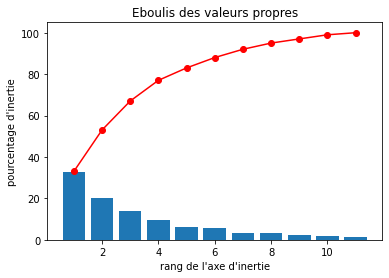

In [237]:
#On peut l'afficher graphiquement
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#### Components

In [238]:
#Intéressons nous maintenant à nos fameuses composantes
#La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :
pcs = pca.components_
pcs

array([[ 3.85407059e-01,  1.60916125e-01,  2.43988997e-01,
         4.44860919e-01,  1.88447005e-01,  3.41764353e-01,
         3.86848725e-01,  2.79400280e-01,  2.53549365e-01,
         3.24566422e-01, -1.35916479e-01],
       [-2.32771175e-01,  5.58077472e-01, -3.68220491e-01,
        -8.98717034e-02, -3.66937497e-02, -8.88577732e-03,
        -1.41405923e-02,  3.88996724e-01,  5.15228956e-01,
        -2.56907108e-01,  7.93594844e-02],
       [ 1.29925059e-01, -7.63165358e-02,  4.20804301e-01,
         1.39235414e-03,  5.78238804e-01, -2.95187361e-01,
        -2.72754922e-01,  1.27459206e-01,  1.99816636e-01,
        -2.11426317e-01,  4.51057094e-01],
       [-3.00572603e-01,  4.76949059e-02,  3.78824217e-02,
        -1.33365506e-01,  6.18658584e-02,  5.25091215e-01,
         3.62098276e-01, -2.26776316e-01, -8.77564946e-02,
         1.80313171e-03,  6.46811093e-01],
       [-2.44264801e-01, -1.61891718e-01,  1.95174426e-01,
        -2.55250931e-01, -2.70550478e-01, -5.77942626e-02,
  

In [239]:
# Affichons la même chose mais version pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10
0,0.385407,0.160916,0.243989,0.444861,0.188447,0.341764,0.386849,0.279400,0.253549,0.324566,-0.135916
1,-0.232771,0.558077,-0.368220,-0.089872,-0.036694,-0.008886,-0.014141,0.388997,0.515229,-0.256907,0.079359
2,0.129925,-0.076317,0.420804,0.001392,0.578239,-0.295187,-0.272755,0.127459,0.199817,-0.211426,0.451057
3,-0.300573,0.047695,0.037882,-0.133366,0.061866,0.525091,0.362098,-0.226776,-0.087756,0.001803,0.646811
4,-0.244265,-0.161892,0.195174,-0.255251,-0.270550,-0.057794,-0.185854,0.516707,0.027640,0.627910,0.194368
5,0.319943,0.287477,0.201845,0.320883,-0.649239,-0.159078,-0.162961,-0.163169,0.006034,-0.068652,0.408091
6,0.147741,0.388578,-0.398582,0.004438,0.331722,-0.166541,-0.206179,-0.336601,-0.100421,0.584942,0.149887
7,-0.053425,0.221236,0.366906,-0.203693,-0.009748,0.513496,-0.549680,-0.278389,0.222252,0.025861,-0.280361
8,0.534384,0.012049,0.051520,-0.727121,-0.103223,-0.096696,0.315359,-0.106910,0.227461,0.017431,-0.000347
9,0.446181,-0.349712,-0.473814,0.013294,-0.008263,0.428247,-0.373001,0.264184,-0.050828,-0.119130,0.211626


In [240]:
#Intéressant... Mais pas encore très clair... Continuons le travail
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
F1,0.39,0.16,0.24,0.44,0.19,0.34,0.39,0.28,0.25,0.32,-0.14
F2,-0.23,0.56,-0.37,-0.09,-0.04,-0.01,-0.01,0.39,0.52,-0.26,0.08
F3,0.13,-0.08,0.42,0.00,0.58,-0.30,-0.27,0.13,0.20,-0.21,0.45
F4,-0.30,0.05,0.04,-0.13,0.06,0.53,0.36,-0.23,-0.09,0.00,0.65
F5,-0.24,-0.16,0.20,-0.26,-0.27,-0.06,-0.19,0.52,0.03,0.63,0.19
F6,0.32,0.29,0.20,0.32,-0.65,-0.16,-0.16,-0.16,0.01,-0.07,0.41
F7,0.15,0.39,-0.40,0.00,0.33,-0.17,-0.21,-0.34,-0.10,0.58,0.15
F8,-0.05,0.22,0.37,-0.20,-0.01,0.51,-0.55,-0.28,0.22,0.03,-0.28
F9,0.53,0.01,0.05,-0.73,-0.10,-0.10,0.32,-0.11,0.23,0.02,-0.00
F10,0.45,-0.35,-0.47,0.01,-0.01,0.43,-0.37,0.26,-0.05,-0.12,0.21


In [241]:
#Dans certains cas, on voudra afficher ce dataframe comme cela
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
PIB PPA $ internationaux courants par habitant (2018),0.385407,-0.232771,0.129925,-0.300573,-0.244265,0.319943,0.147741,-0.053425,0.534384,0.446181,-0.136750
Population Totale (2018),0.160916,0.558077,-0.076317,0.047695,-0.161892,0.287477,0.388578,0.221236,0.012049,-0.349712,-0.472570
Stabilité Politique (2018),0.243989,-0.368220,0.420804,0.037882,0.195174,0.201845,-0.398582,0.366906,0.051520,-0.473814,-0.163998
Indice de performance logistique - performance globale (2018),0.444861,-0.089872,0.001392,-0.133366,-0.255251,0.320883,0.004438,-0.203693,-0.727121,0.013294,0.194220
Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,0.188447,-0.036694,0.578239,0.061866,-0.270550,-0.649239,0.331722,-0.009748,-0.103223,-0.008263,-0.096884
Importations Poulet en boite – Quantité (en Tonnes) – 2018,0.341764,-0.008886,-0.295187,0.525091,-0.057794,-0.159078,-0.166541,0.513496,-0.096696,0.428247,-0.086346
Parts de marché en importation (en %),0.386849,-0.014141,-0.272755,0.362098,-0.185854,-0.162961,-0.206179,-0.549680,0.315359,-0.373001,0.017355
Parts de marché en exportation (en %),0.279400,0.388997,0.127459,-0.226776,0.516707,-0.163169,-0.336601,-0.278389,-0.106910,0.264184,-0.370554
Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,0.253549,0.515229,0.199817,-0.087756,0.027640,0.006034,-0.100421,0.222252,0.227461,-0.050828,0.712756
Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,0.324566,-0.256907,-0.211426,0.001803,0.627910,-0.068652,0.584942,0.025861,0.017431,-0.119130,0.166269


<AxesSubplot:>

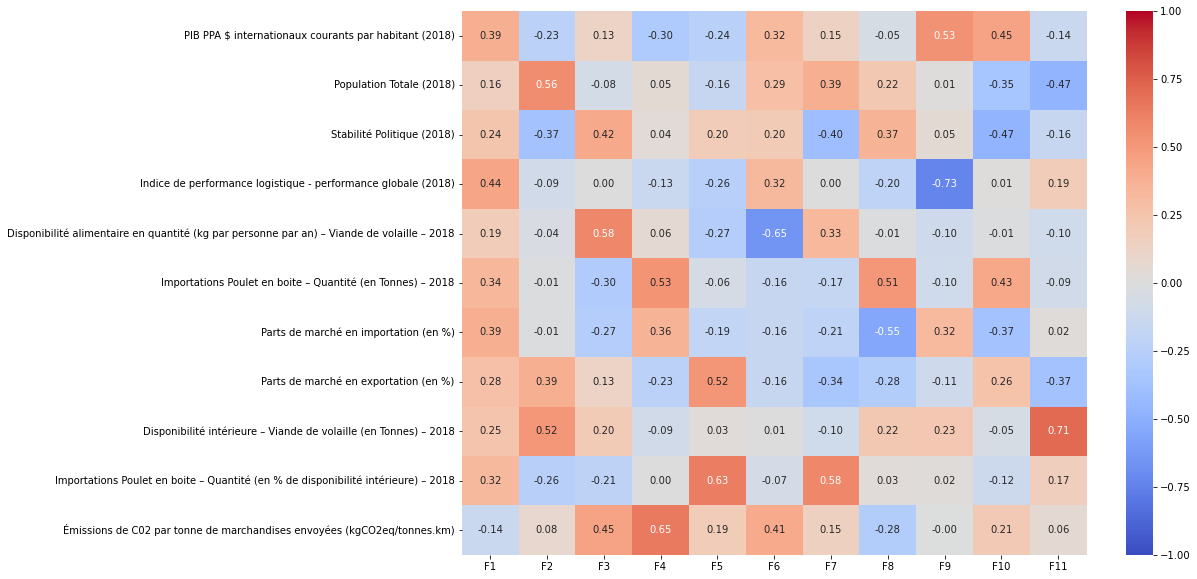

In [242]:
#Et pour une représentation visuelle comme cela
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Cercle des corrélations

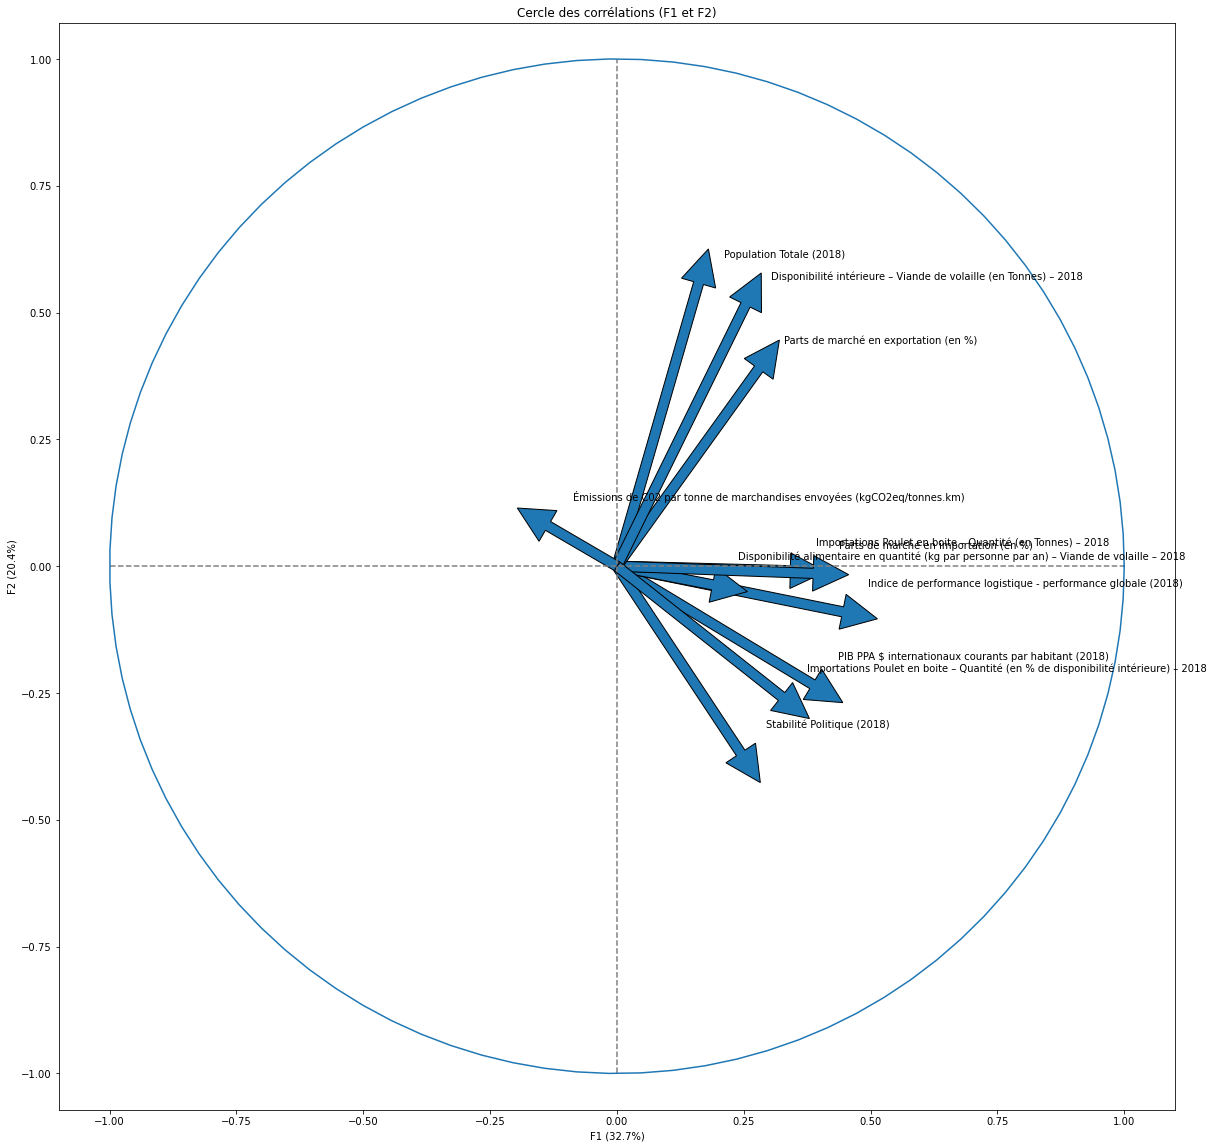

In [243]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 0,1

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

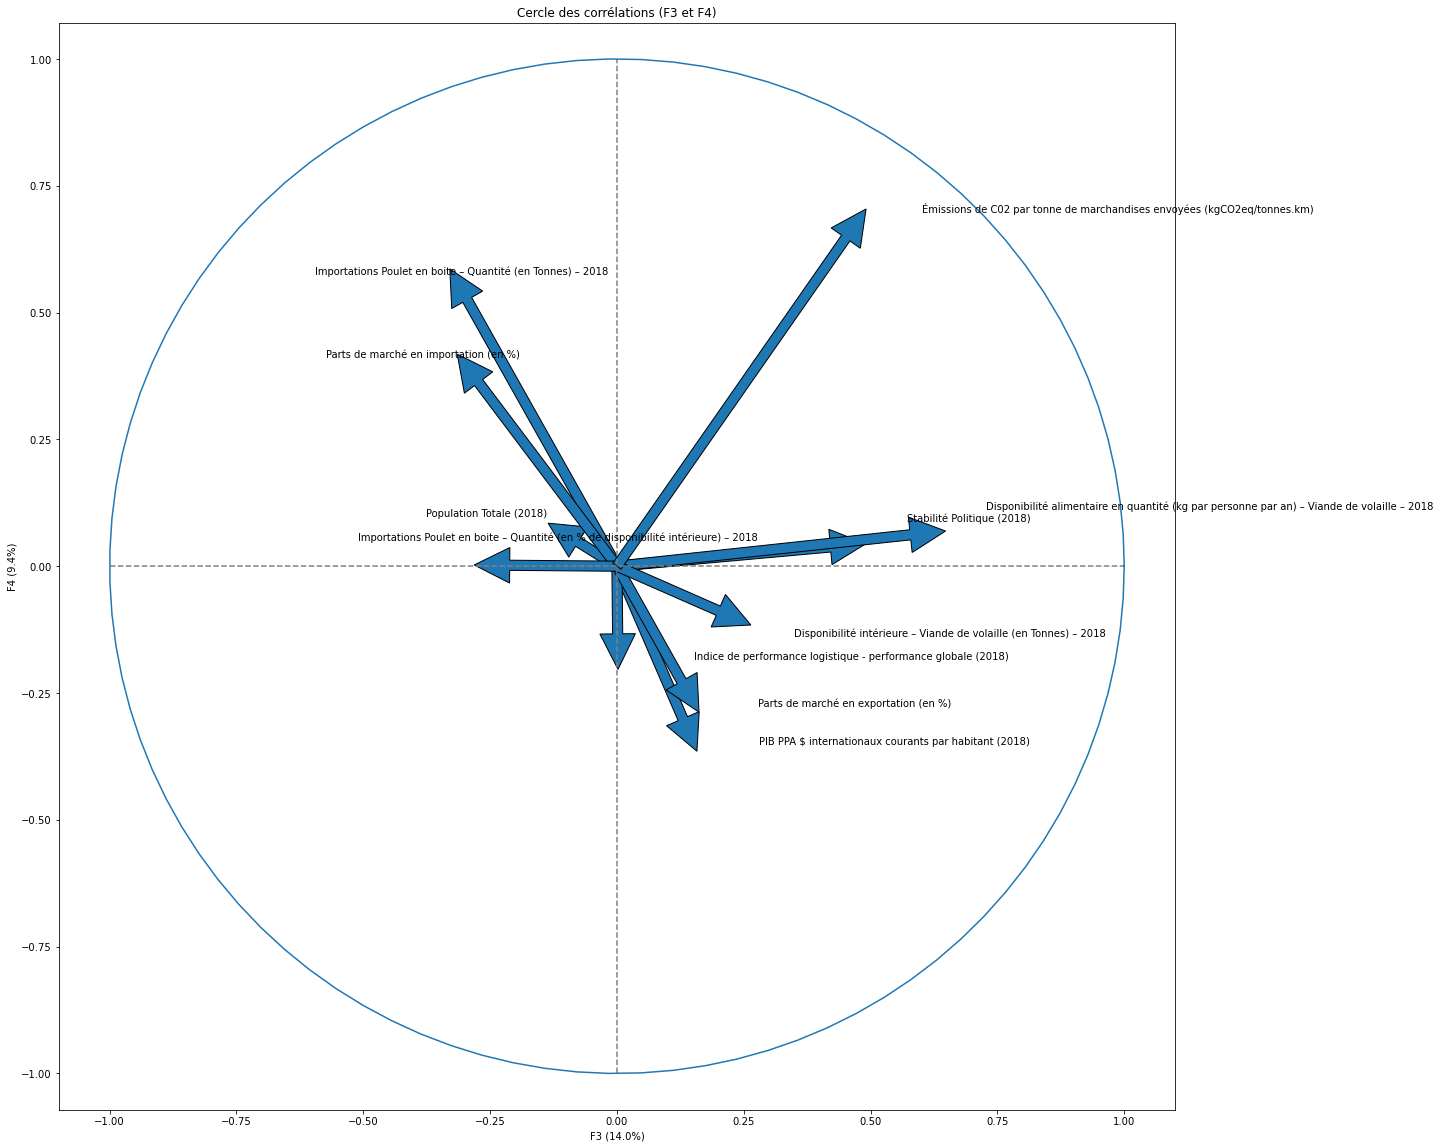

In [244]:
#Définissons nos axes x et y.
#Nous allons utiliser les 2 premières composantes.
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x, y = 2,3

#Pour la partie graphique

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
     # Les labels
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] - 0.05,
            features[i])
    if (pca.components_[2, i] < 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] - 0.30,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] > 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] + 0.05,
            features[i])
    if (pca.components_[2, i] > 0) & (pca.components_[3, i] < 0) :
            plt.text(pca.components_[2, i] + 0.15,
            pca.components_[3, i] - 0.05,
            features[i])
    
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

#### Projection

In [245]:
#Travaillons maintenant sur la projection de nos dimensions. 
#Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace
X_proj = pca.transform(X_scaled)


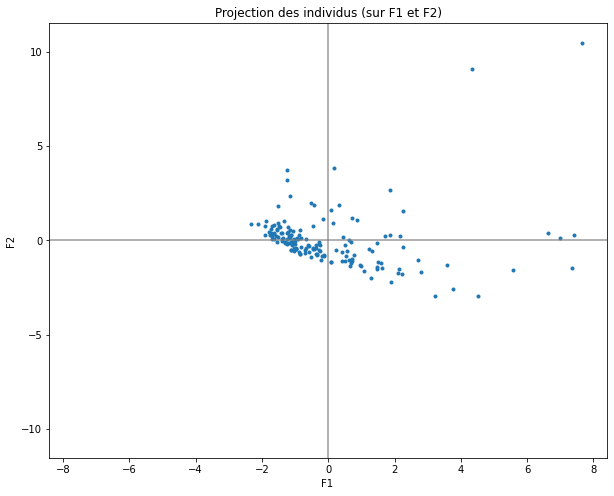

In [246]:
#Essayons la version simple avec F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y)

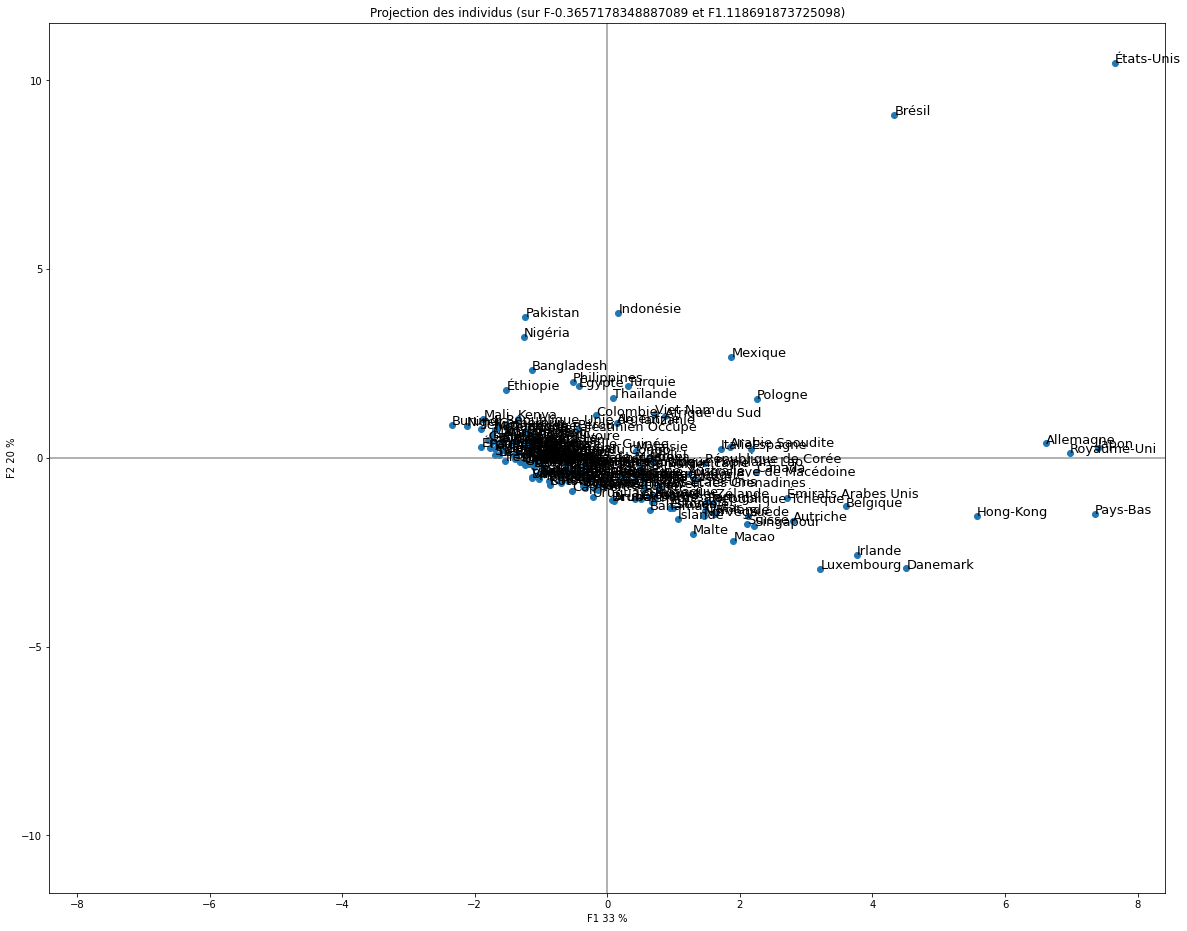

In [247]:
#Essayons la version plus élaborée avec F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

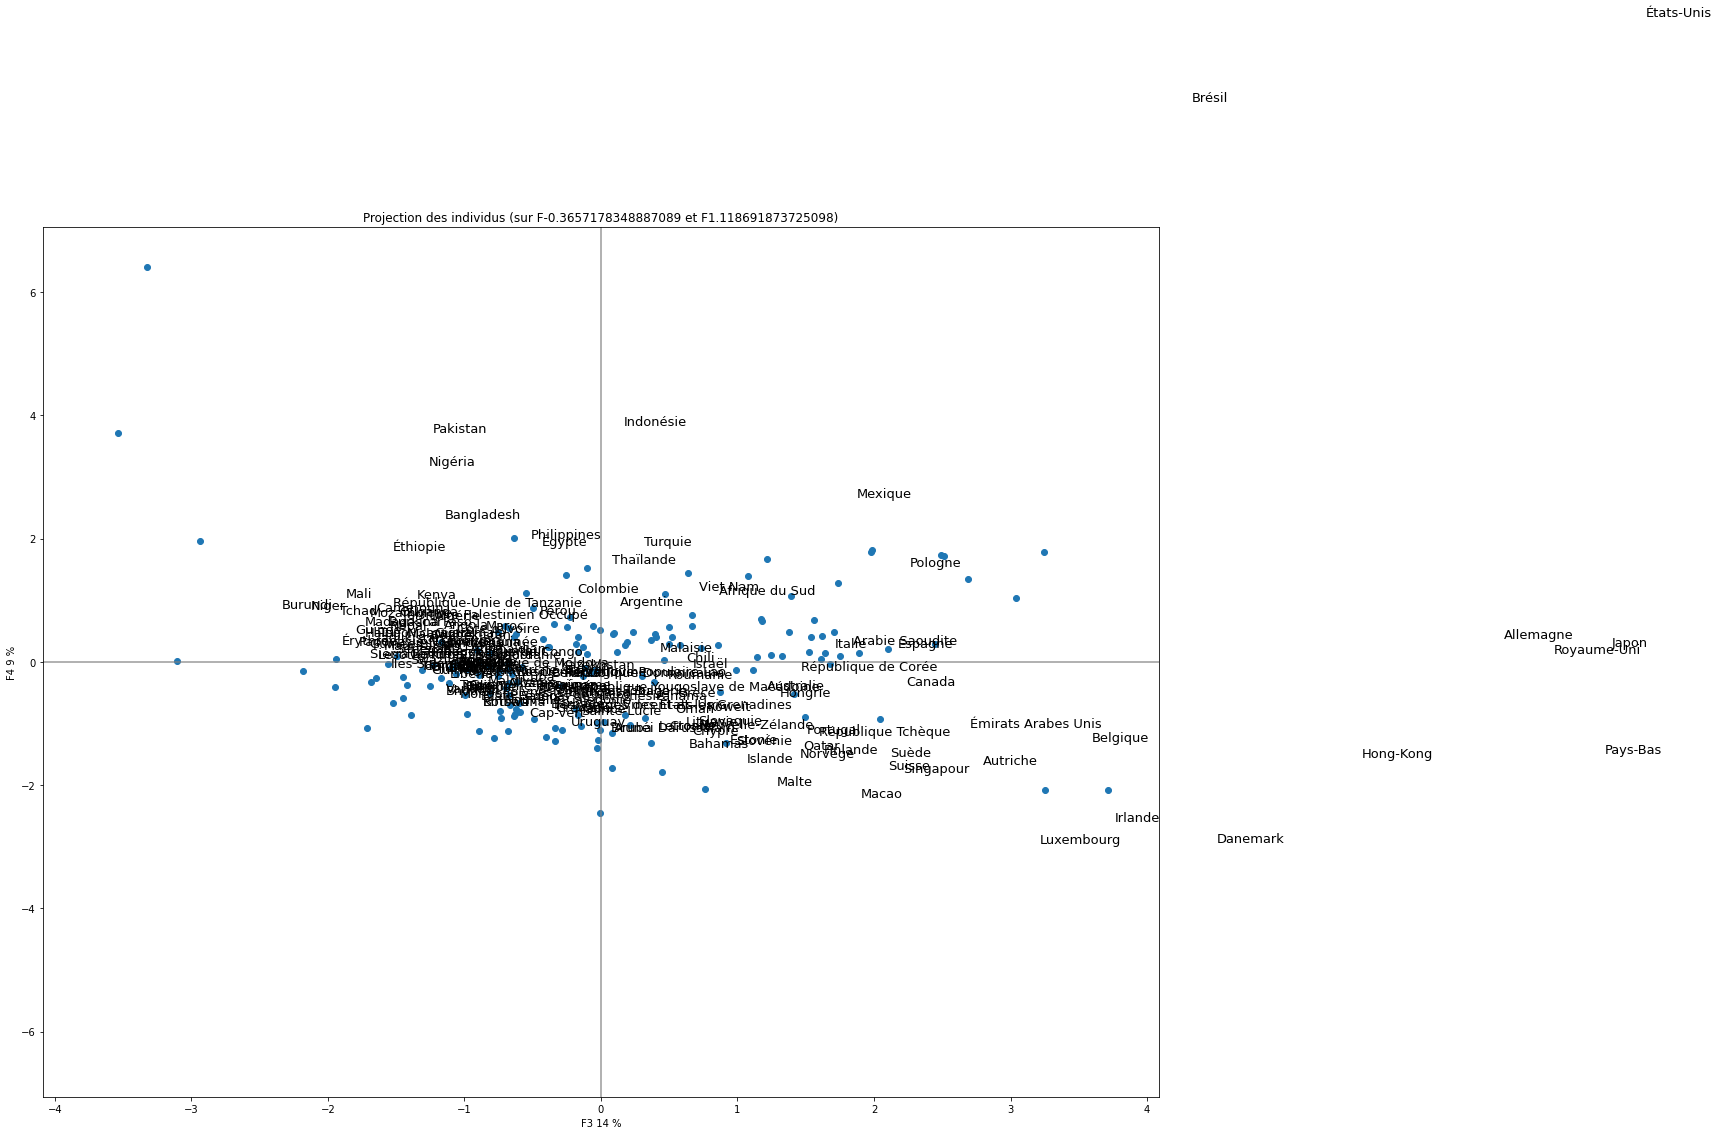

In [248]:
#Essayons maintenant avec F3 et F4
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

### Sauvegarde avant de passer au clustering

In [113]:
df_exclu.to_csv('df_simple3.csv')